In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
!pip install ucimlrepo

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------- ----------- 7.9/11.0 MB 37.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 35.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features # Predictors
y = wine_quality.data.targets  # Output (Qualidade)
  
red_wine_data   = pd.read_csv("dataset/winequality-red.csv",   sep=';') # Define data of red_wine
white_wine_data = pd.read_csv("dataset/winequality-white.csv", sep=';') # Define data of white_wine

# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [38]:
red_stats = red_wine_data.describe().loc[['min', 'max', 'mean']]
white_stats = white_wine_data.describe().loc[['min', 'max', 'mean']]

# Transforma as estatísticas para formato de tabela hierárquica
tabela_formatada = pd.DataFrame({
    ('Red wine', 'Min'):  red_stats.loc['min'],
    ('Red wine', 'Max'):  red_stats.loc['max'],
    ('Red wine', 'Mean'): red_stats.loc['mean'],
    ('White wine', 'Min'):  white_stats.loc['min'],
    ('White wine', 'Max'):  white_stats.loc['max'],
    ('White wine', 'Mean'): white_stats.loc['mean']
})

# Ajusta a hierarquia das colunas
tabela_formatada.columns = pd.MultiIndex.from_tuples(tabela_formatada.columns)

# Exibe com formatação
pd.set_option('display.float_format', '{:.2f}'.format)

display(tabela_formatada)


Red wine              White wine              
                          Min    Max  Mean        Min    Max   Mean
fixed acidity            4.60  15.90  8.32       3.80  14.20   6.85
volatile acidity         0.12   1.58  0.53       0.08   1.10   0.28
citric acid              0.00   1.00  0.27       0.00   1.66   0.33
residual sugar           0.90  15.50  2.54       0.60  65.80   6.39
chlorides                0.01   0.61  0.09       0.01   0.35   0.05
free sulfur dioxide      1.00  72.00 15.87       2.00 289.00  35.31
total sulfur dioxide     6.00 289.00 46.47       9.00 440.00 138.36
density                  0.99   1.00  1.00       0.99   1.04   0.99
pH                       2.74   4.01  3.31       2.72   3.82   3.19
sulphates                0.33   2.00  0.66       0.22   1.08   0.49
alcohol                  8.40  14.90 10.42       8.00  14.20  10.51
quality                  3.00   8.00  5.64       3.00   9.00   5.88

## Unconditional mono-variate analysis

## Statistics of dataset

__Statistics with every type of wine__

In [4]:

print("--- Features Statistics ---\n", X.describe())
print("--- Target Statistics ---\n", y.describe())

--- Features Statistics ---
        fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000 

__Conclusions:__

Analyzing these results we notice that this dataset has 11 types of features, which are phisicochemical properties of wine, like the acidity, density and alcohol content. Furthermore, this dataset has only one output or target, the quality of wine, which is a grade given by experts that measures how good is the wine in a scale from 0 (bad) to 10 (excelent).

We also can notice that some of the predictors have a considerable standard deviation, with values above 50, probably because of the difference in the type of wines. What i mean by that is that probably the difference between the red wine and white wine is the reason for these absurd values, and analyzing them separatly should change this result.

## Statistics of each wine apart

__Red wine__

In [47]:
print("--- Red_wine Features Statistics ---\n", red_wine_data.describe())

print("-----Skewness----\n", red_wine_data.skew())

--- Red_wine Features Statistics ---
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    1599.00              1599.00               1599.00  1599.00 1599.00   
mean        0.09                15.87                 46.47     1.00    3.31   
std         0.05                10.46                 32.90     0.00    0.15   
mi

__White Wine__

In [42]:
print("--- White_wine Features Statistics ---\n", white_wine_data.describe())
print("-----Skewness----\n", white_wine_data.skew())

--- White_wine Features Statistics ---
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    4898.00              4898.00               4898.00  4898.00 4898.00   
mean        0.05                35.31                138.36     0.99    3.19   
std         0.02                17.01                 42.50     0.00    0.15   


__Conclusions__

Analyzing both types of wine separatly gives a more precise form of measure each predictor. We notice that the standard deviation of mosto of the predictors has decreased, but there are still some predictors like free sulfur dioxide that have a considerable standard deviation in both types of wine.

We can also notice that the mean value of residual sugar in white wine is almost three times greater than the red wine, which justify the more sweet taste of white wine. The quantity of sulfur dioxide is also considerably greater in the white wine than the red wine.

## Histogram, scatter plot and box-plot of each wine

__Plots with every type of wine__

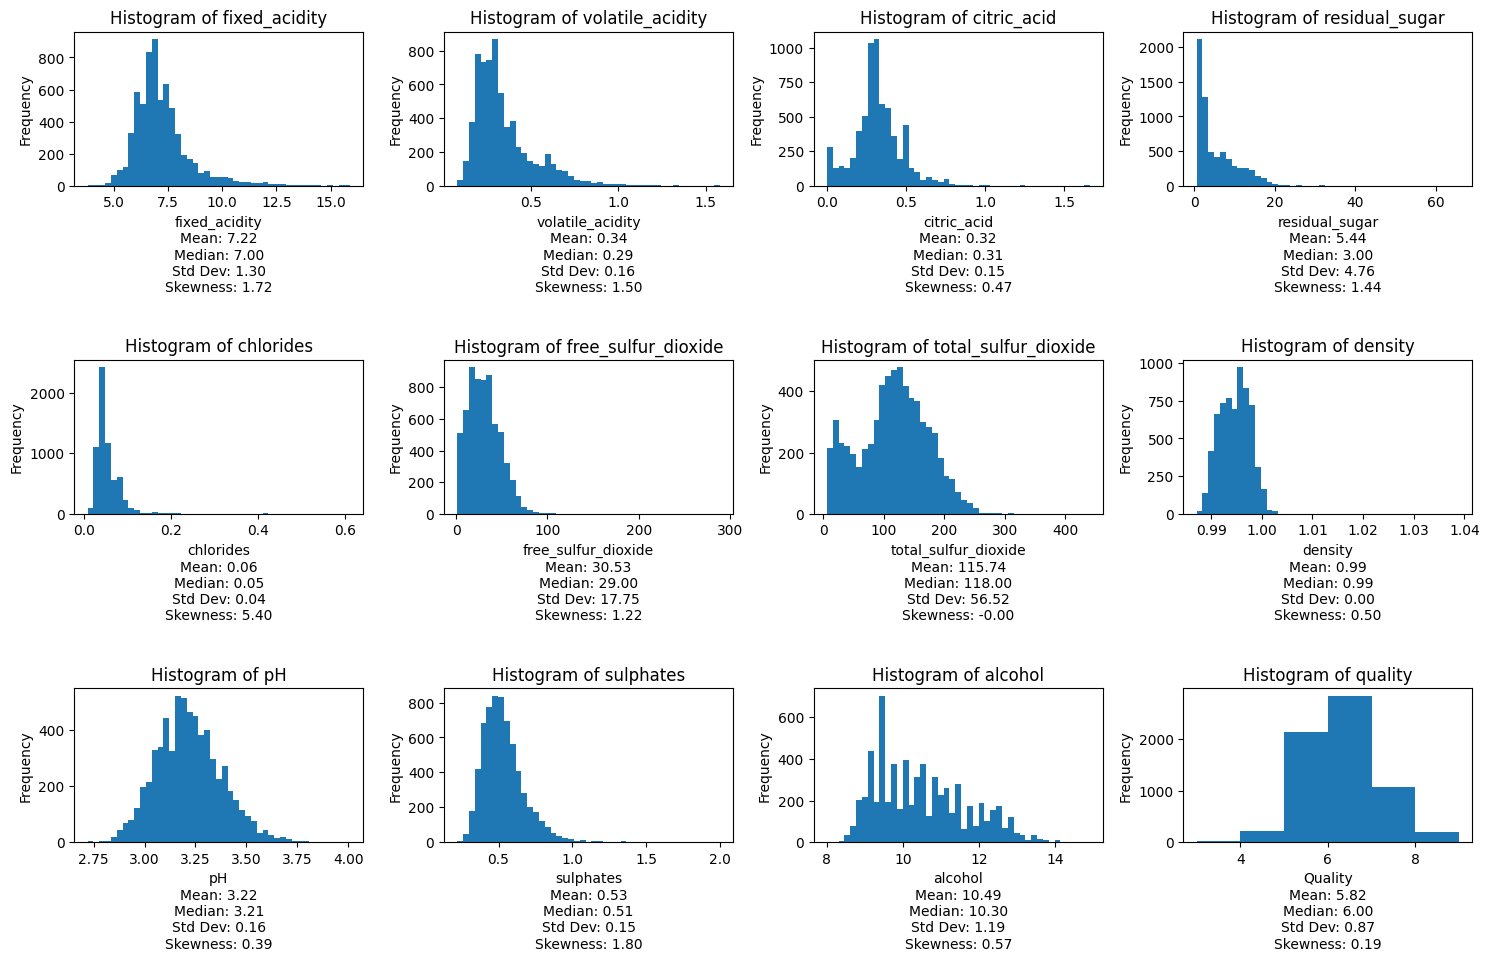

In [17]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    X[col].dropna().plot.hist(bins=45, ax=axes[i])

    mean_val = X[col].mean()
    median_val = X[col].median()
    std_val = X[col].std()
    skew_val = X[col].skew()


    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {col}")
    text_str = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}\nSkewness: {skew_val:.2f}'
    axes[i].text(0.5, -0.3, text_str, transform=axes[i].transAxes,
               fontsize=10, verticalalignment='top', horizontalalignment='center')

y['quality'].dropna().plot.hist(bins=6, ax=axes[11])

mean_val = y['quality'].mean()
median_val = y['quality'].median()
std_val = y['quality'].std()
skew_val = y['quality'].skew()

axes[11].set_xlabel('Quality')
axes[11].set_ylabel('Frequency')
axes[11].set_title(f'Histogram of quality')
text_str = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}\nSkewness: {skew_val:.2f}'
axes[11].text(0.5, -0.3, text_str, transform=axes[11].transAxes,
            fontsize=10, verticalalignment='top', horizontalalignment='center')

plt.tight_layout()
plt.show()

__Conclusions__

Analyzing these charts we can notice that most of the variables have an assymetric distribution (fixed acidity, residual sugar, chlorides etc), with a high skewness. There are also some predictors that have a distribution similar to normal, like citric acid, density and pH, with a low value of skewness.

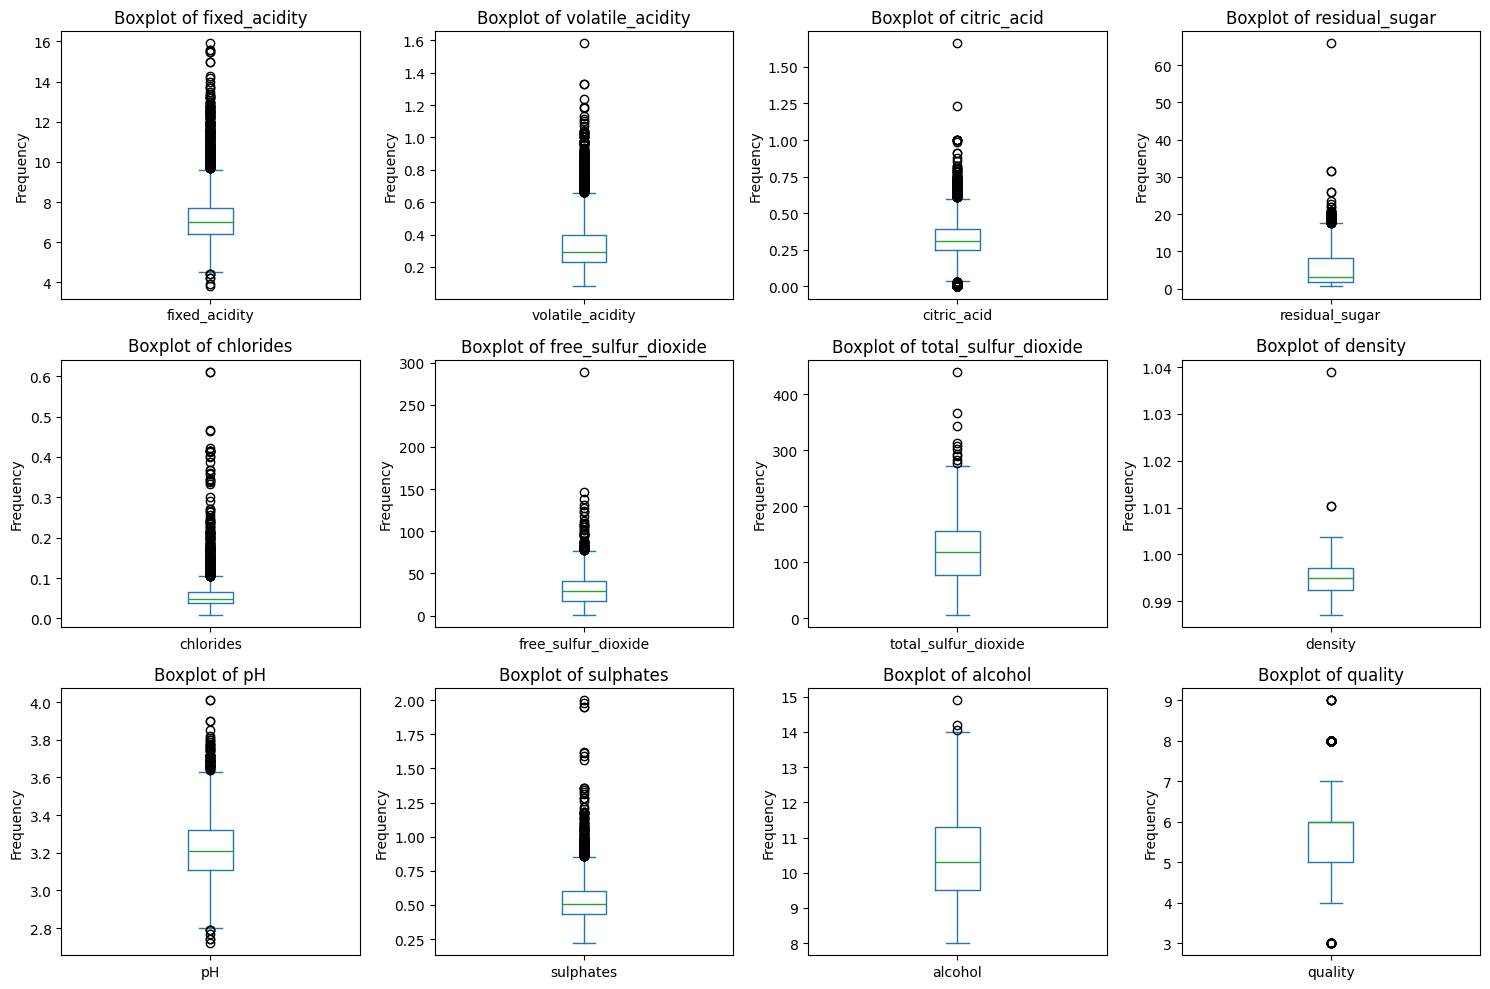

In [18]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    X[col].dropna().plot.box(ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Boxplot of {col}")

y['quality'].dropna().plot.box(ax=axes[11])
axes[11].set_ylabel('Frequency')
axes[11].set_title(f'Boxplot of quality')

plt.tight_layout()
plt.show()

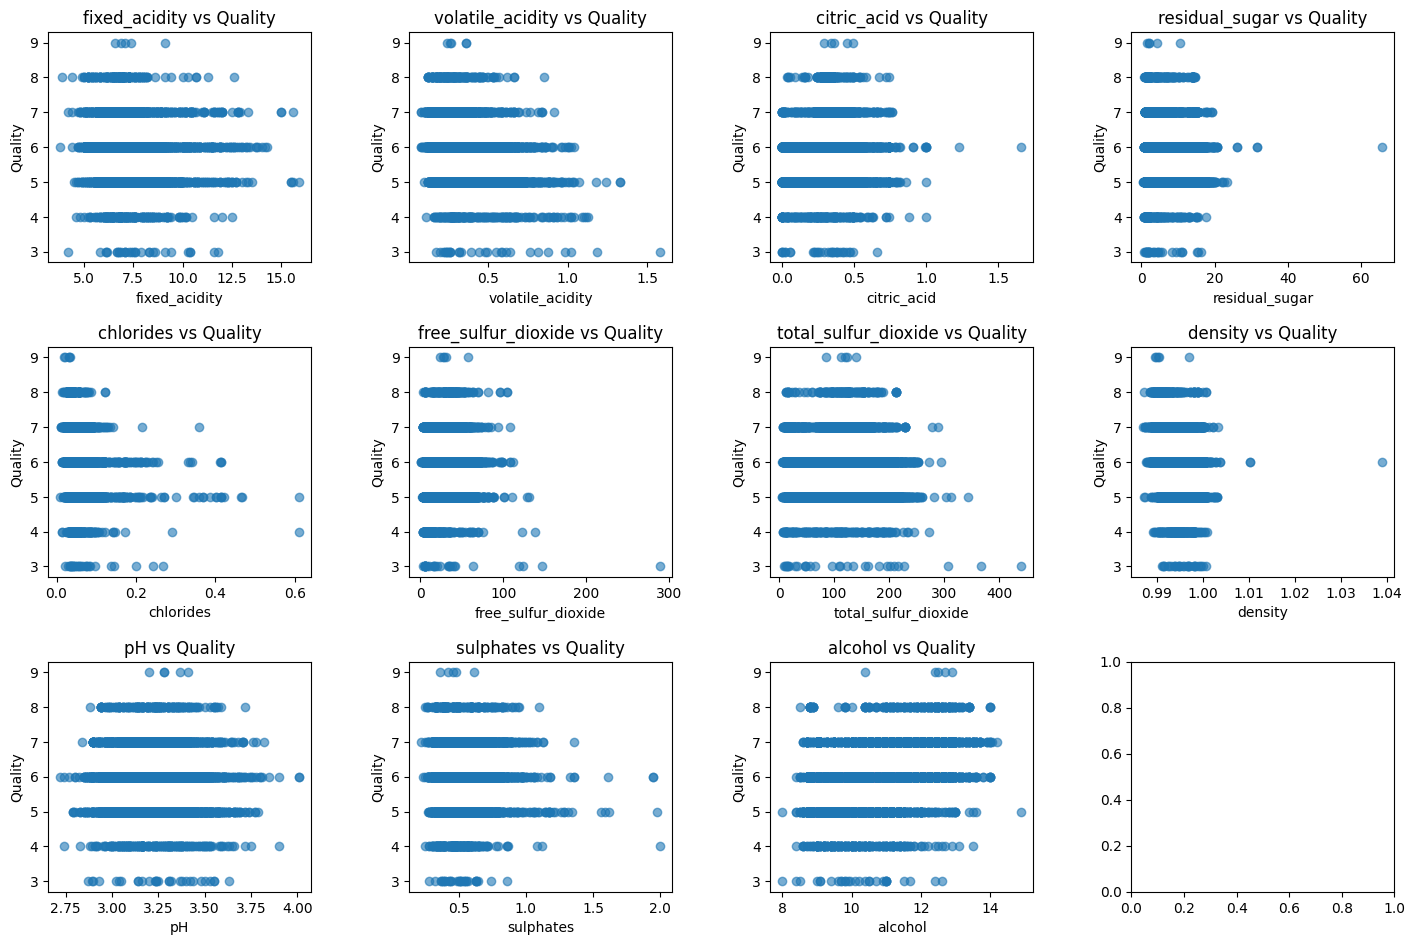

In [19]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=4.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].scatter(X[col], y['quality'], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{col} vs Quality")
plt.show()


__Plots of Red_Wine__

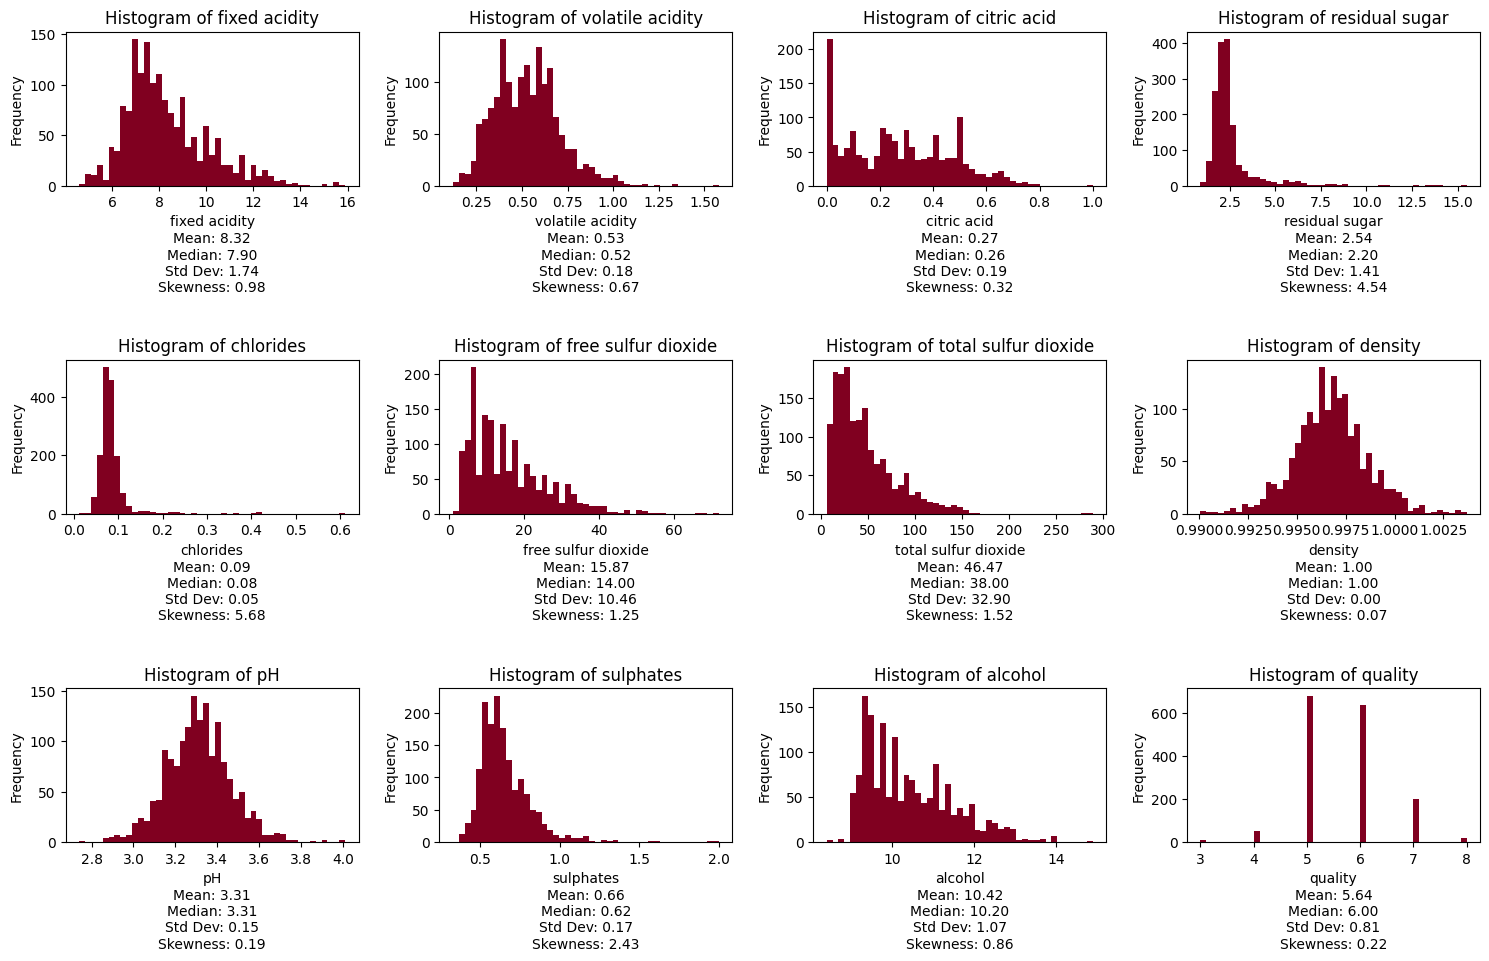

In [ ]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    red_wine_data[col].dropna().plot.hist(bins=45, ax=axes[i], color='#800020')
    
    mean_val = red_wine_data[col].mean()
    median_val = red_wine_data[col].median()
    std_val = red_wine_data[col].std()
    skew_val = red_wine_data[col].skew()


    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {col}")
    text_str = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}\nSkewness: {skew_val:.2f}'
    axes[i].text(0.5, -0.3, text_str, transform=axes[i].transAxes,
               fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.tight_layout()
plt.show()

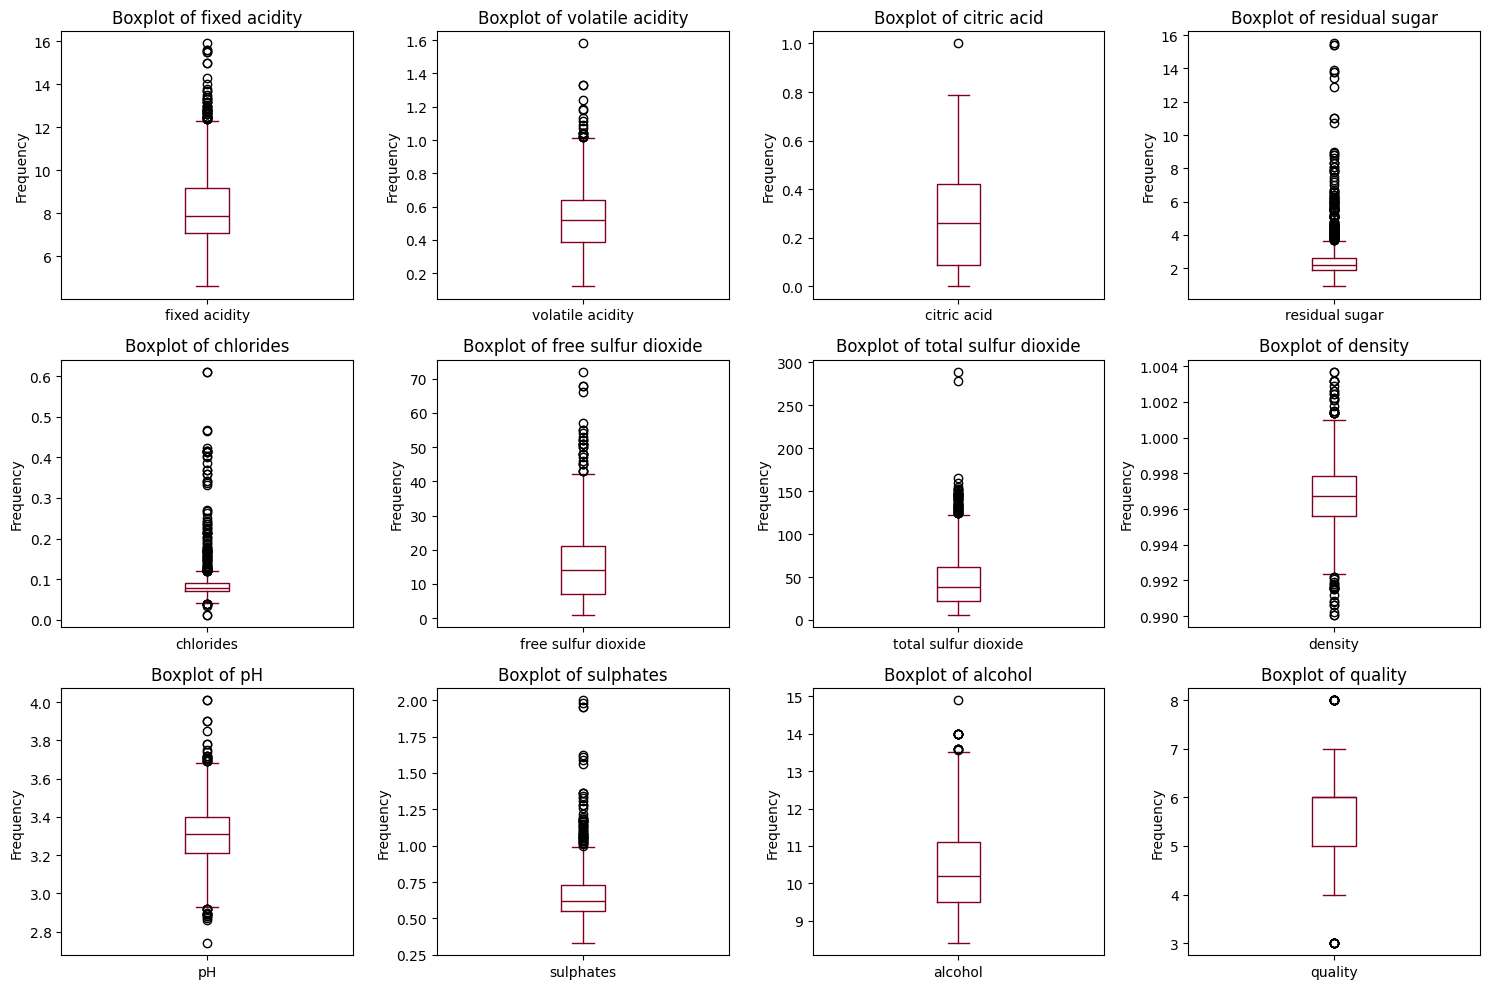

In [25]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    red_wine_data[col].dropna().plot.box(ax=axes[i], color='#800020')
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()
plt.show()

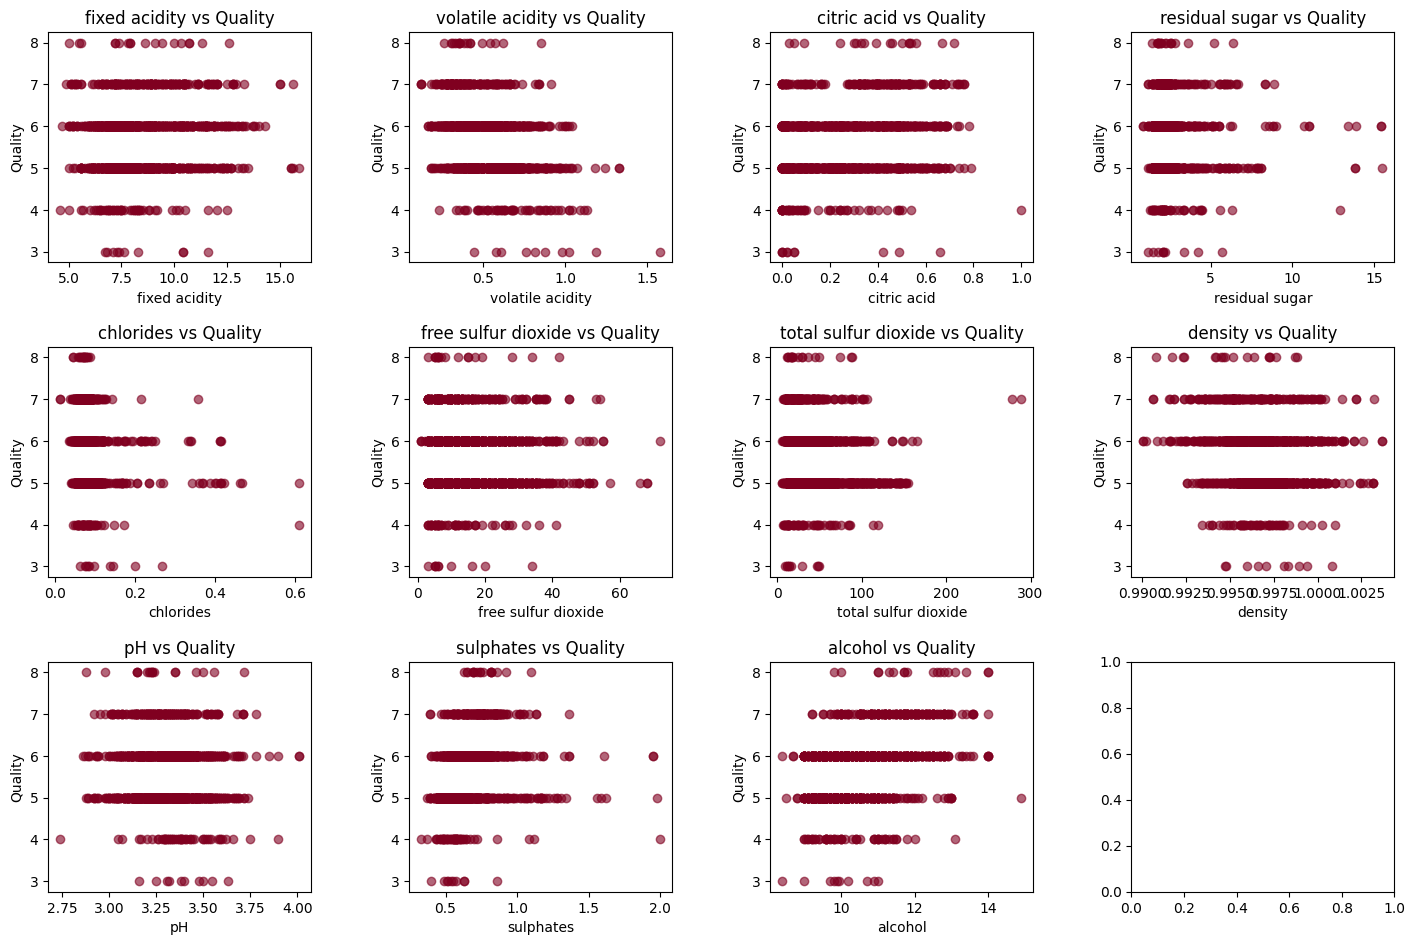

In [22]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=4.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].scatter(red_wine_data[col], red_wine_data['quality'], alpha=0.6, color='#800020')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{col} vs Quality")
plt.show()


__Plots of White_Wine__

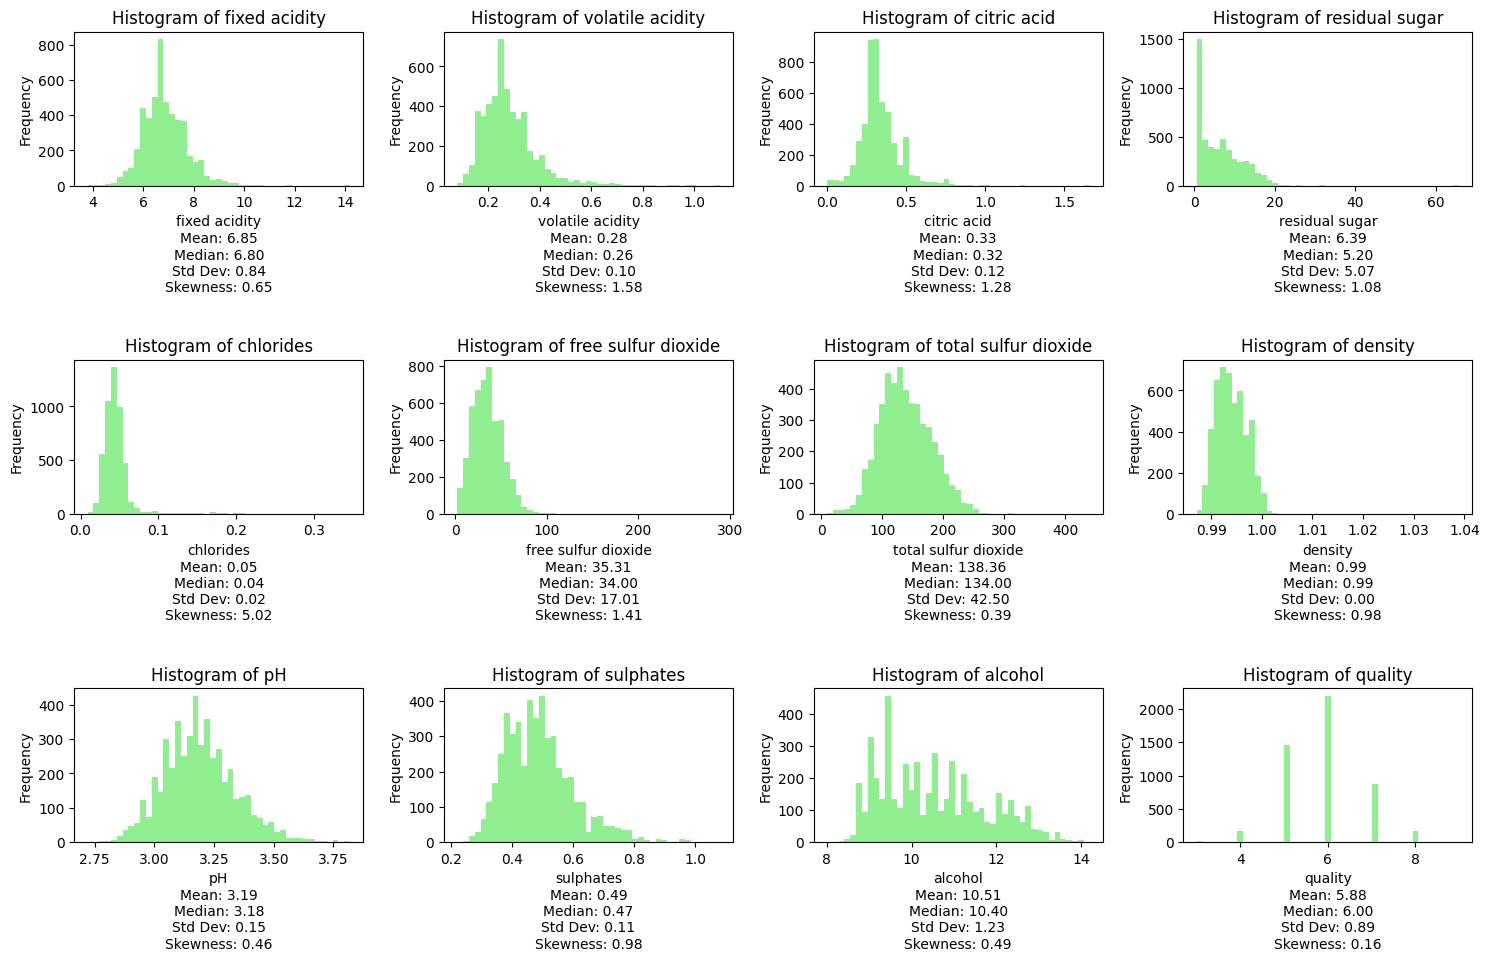

In [26]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    white_wine_data[col].dropna().plot.hist(bins=45, ax=axes[i], color='#90EE90')
    
    mean_val = white_wine_data[col].mean()
    median_val = white_wine_data[col].median()
    std_val = white_wine_data[col].std()
    skew_val = white_wine_data[col].skew()


    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {col}")
    text_str = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}\nSkewness: {skew_val:.2f}'
    axes[i].text(0.5, -0.3, text_str, transform=axes[i].transAxes,
               fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.tight_layout()
plt.show()

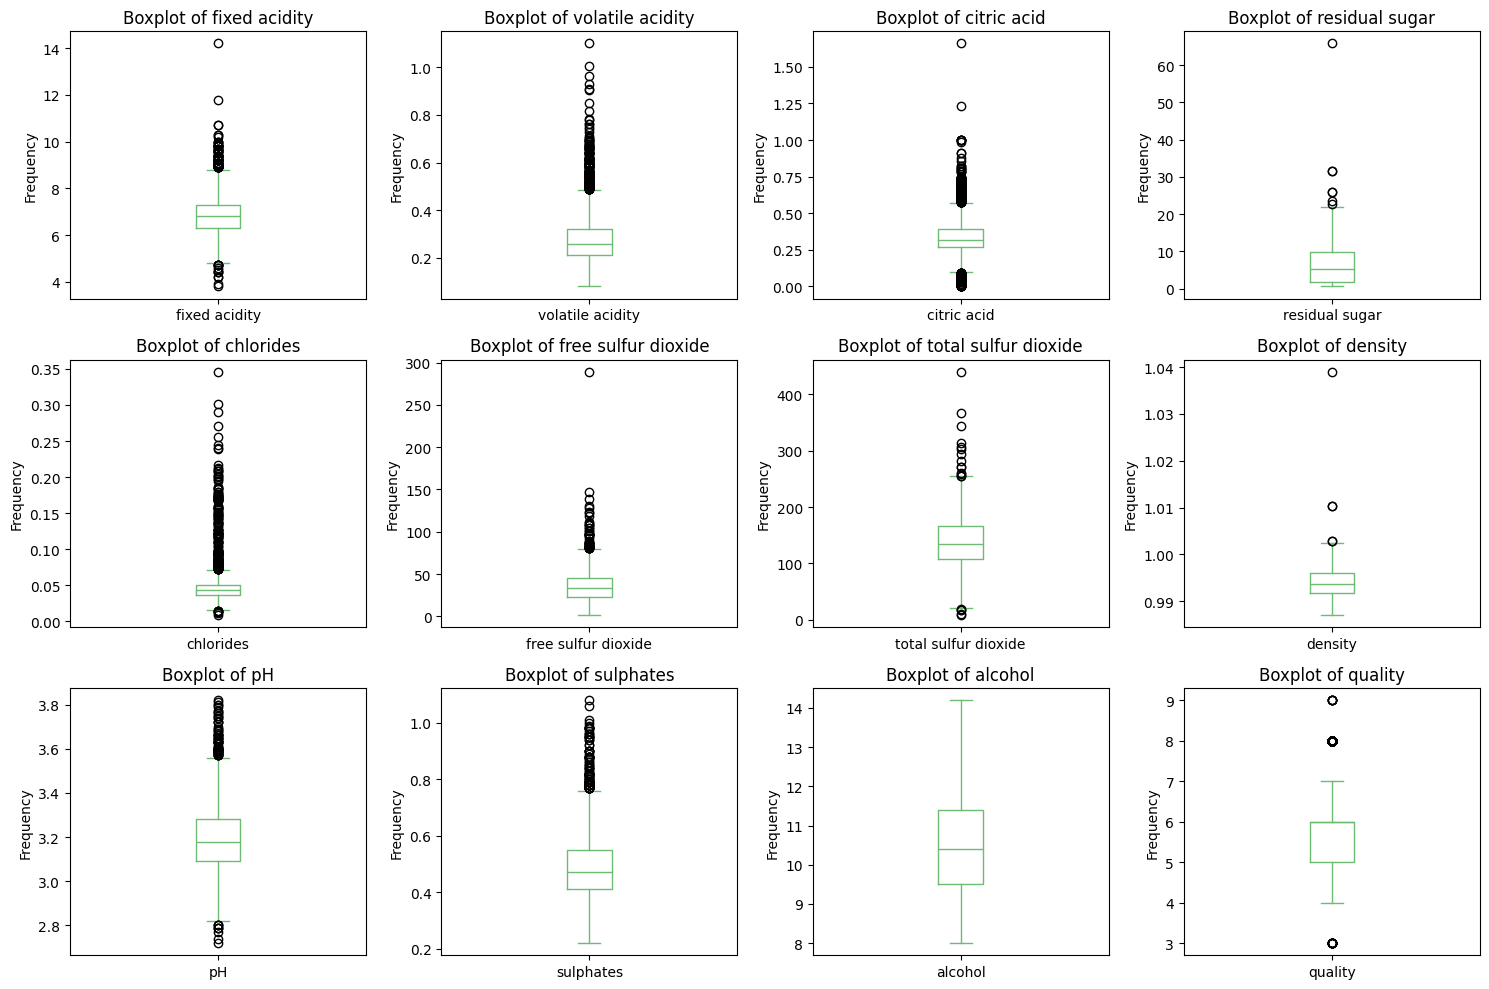

In [29]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    white_wine_data[col].dropna().plot.box(ax=axes[i], color="#6EBB74")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()
plt.show()

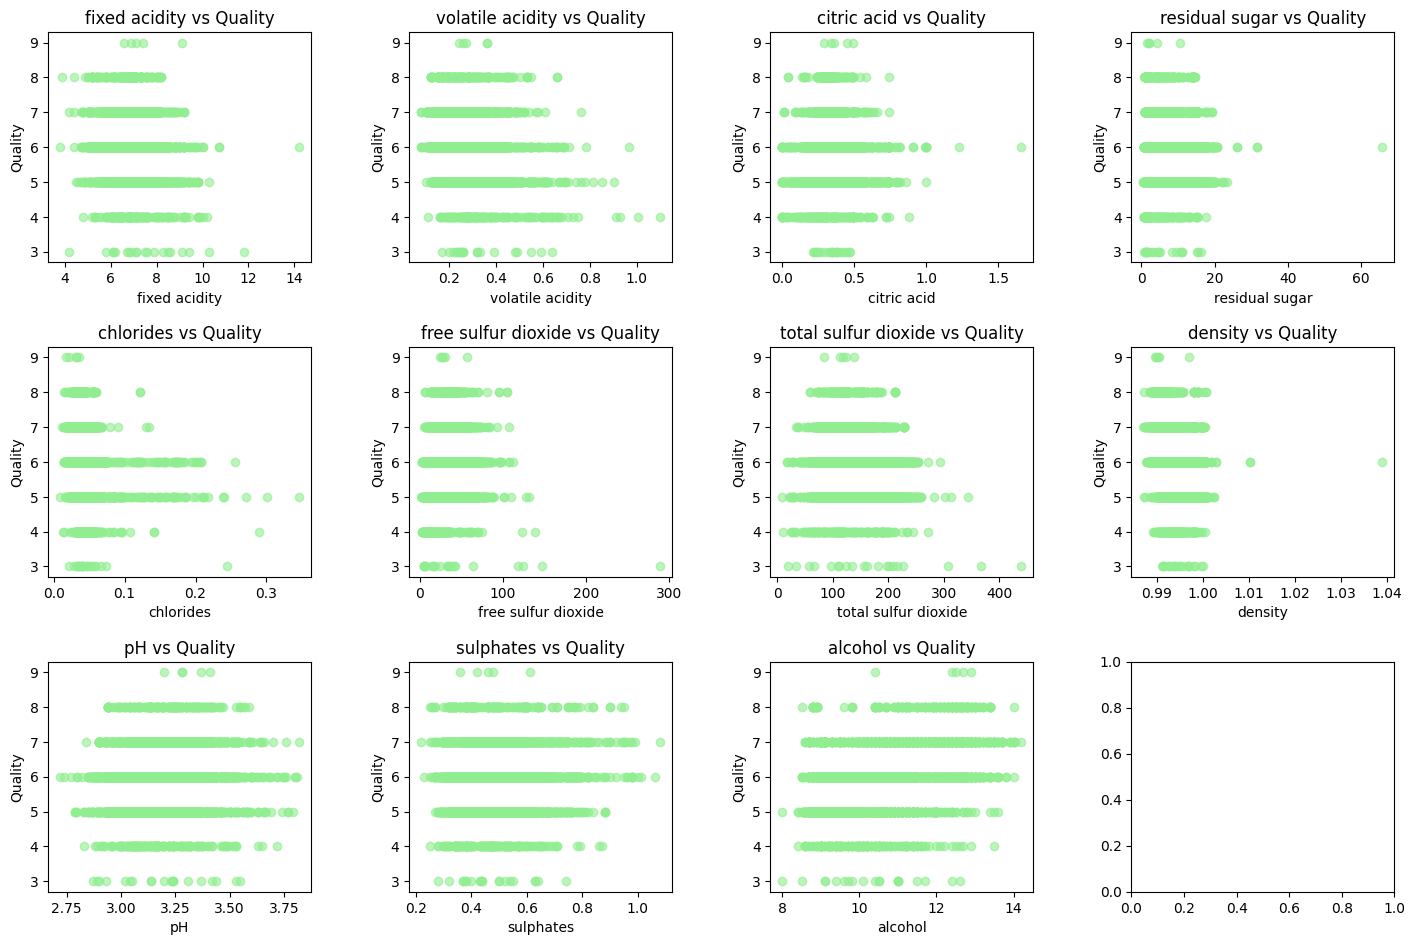

In [27]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=4.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].scatter(white_wine_data[col], white_wine_data['quality'], alpha=0.6, color='#90EE90')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{col} vs Quality")
plt.show()


__Final conclusions__

Through the univariate analysis, we identified and visualized significant differences between the two types of wine. Notably, residual sugar and sulfur dioxide levels vary substantially: white wines tend to contain higher amounts of residual sugar, while red wines generally exhibit higher concentrations of sulfur dioxide. Additionally, variables such as free and total sulfur dioxide show considerable standard deviations, indicating high variability within the samples.

Visualyzing the histogram plots, most predictors have asymmetric distributions with high skewness, for example, chlorides and fixed acidity. However, some predictors, such as pH and density, have a distribution similar to normal with a low skewness.

The box-plot showed the presence of outliers in almost every predictors in both types of wine, except for the alcohol in the White wine dataset, which has no outliers.

Furthermore, from the scatter plots and quality histogram, we observed that most wines received average quality scores in both categories. However, white wines exhibited a slightly higher mean quality score, despite their larger dataset size.

## More detailed data

In [13]:
X.skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
dtype: float64

In [14]:
y.skew()

quality    0.189623
dtype: float64

# Fixed acidity

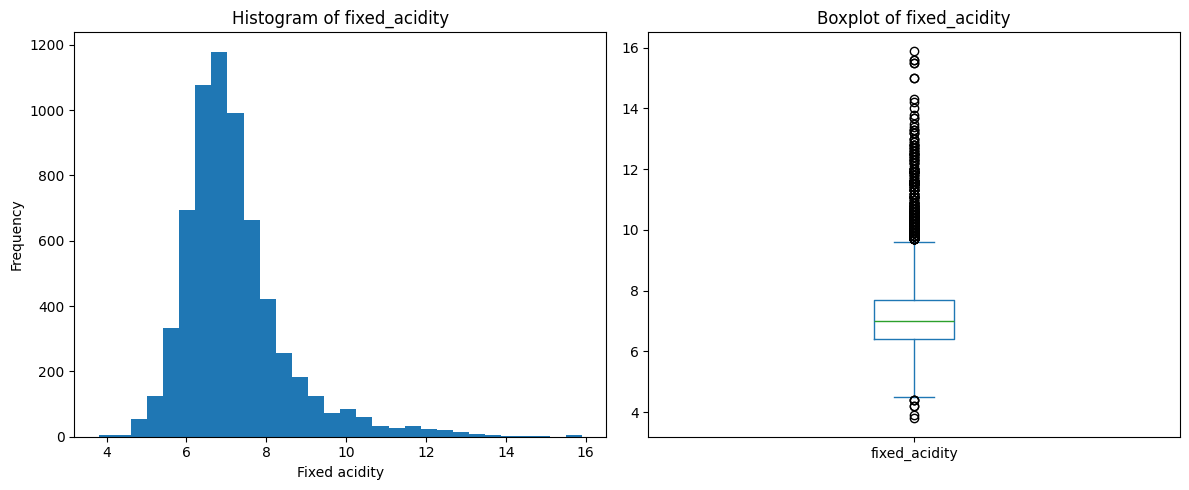

In [ ]:
column = 'fixed_acidity'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=30, ax=axes[0])
axes[0].set_xlabel('Fixed acidity')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Volatile acidity

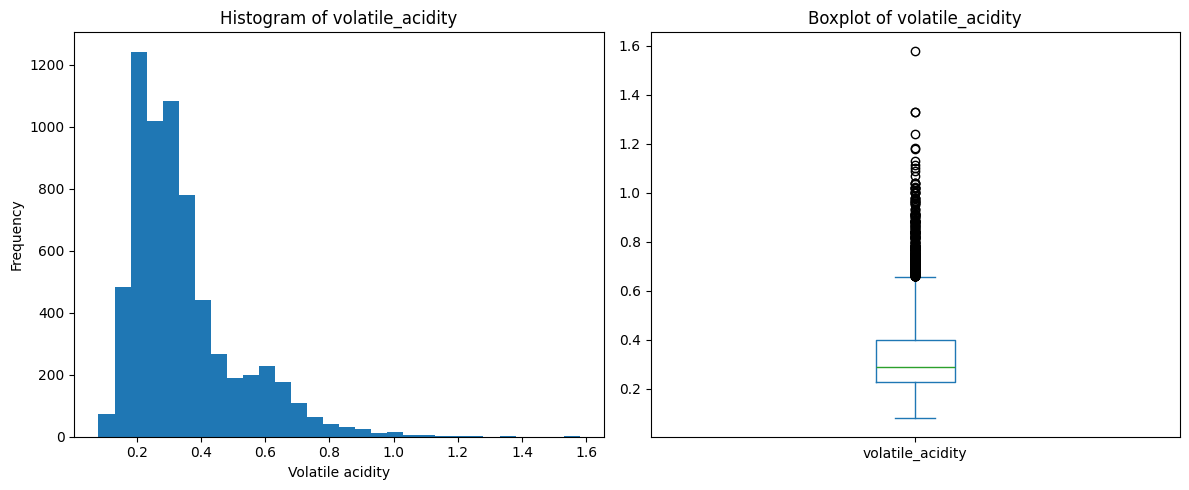

In [36]:
column = 'volatile_acidity'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=30, ax=axes[0])
axes[0].set_xlabel('Volatile acidity')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Citric acid

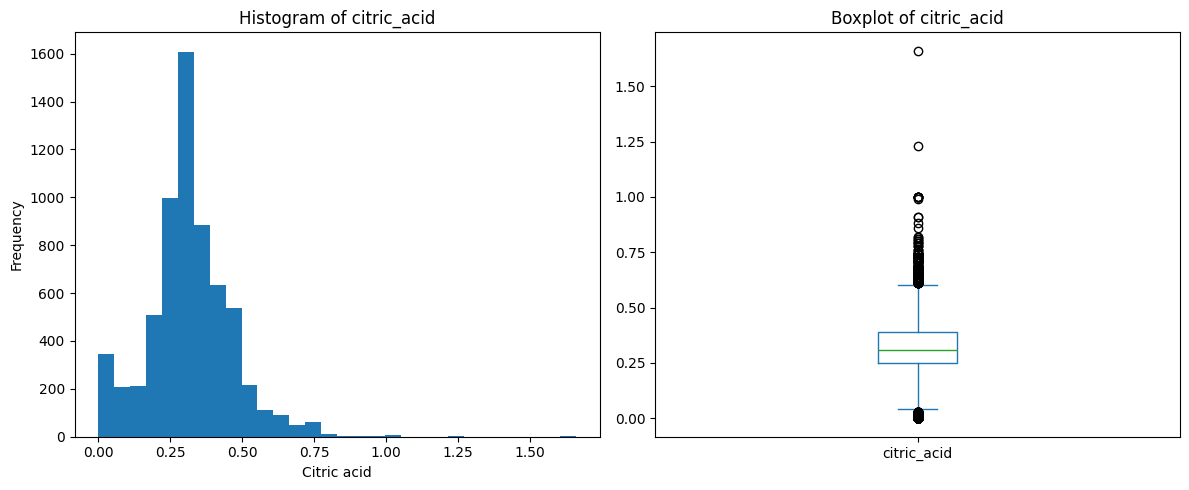

In [37]:
column = 'citric_acid'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=30, ax=axes[0])
axes[0].set_xlabel('Citric acid')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Residual sugar

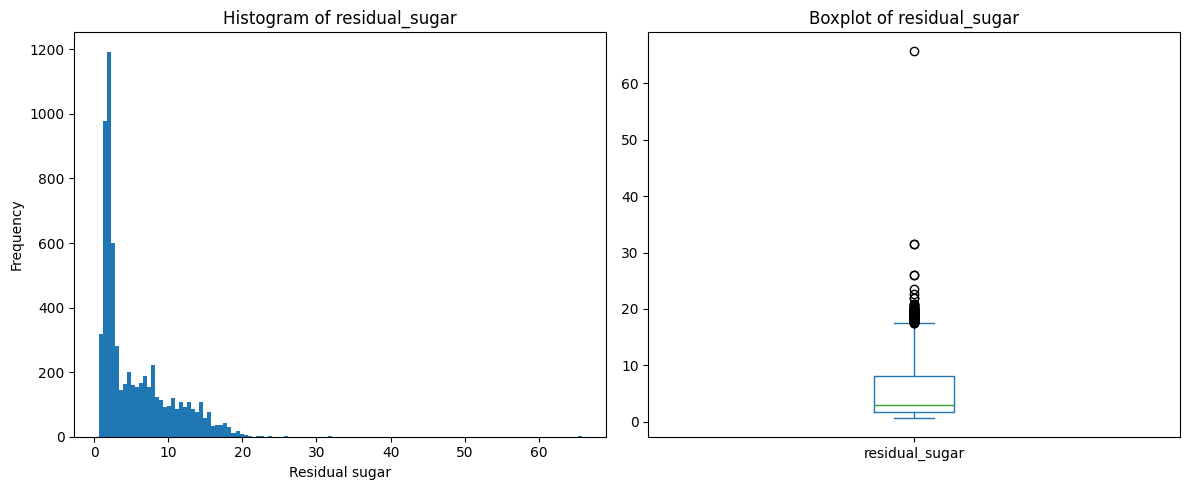

In [41]:
column = 'residual_sugar'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=120, ax=axes[0])
axes[0].set_xlabel('Residual sugar')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Chlorides

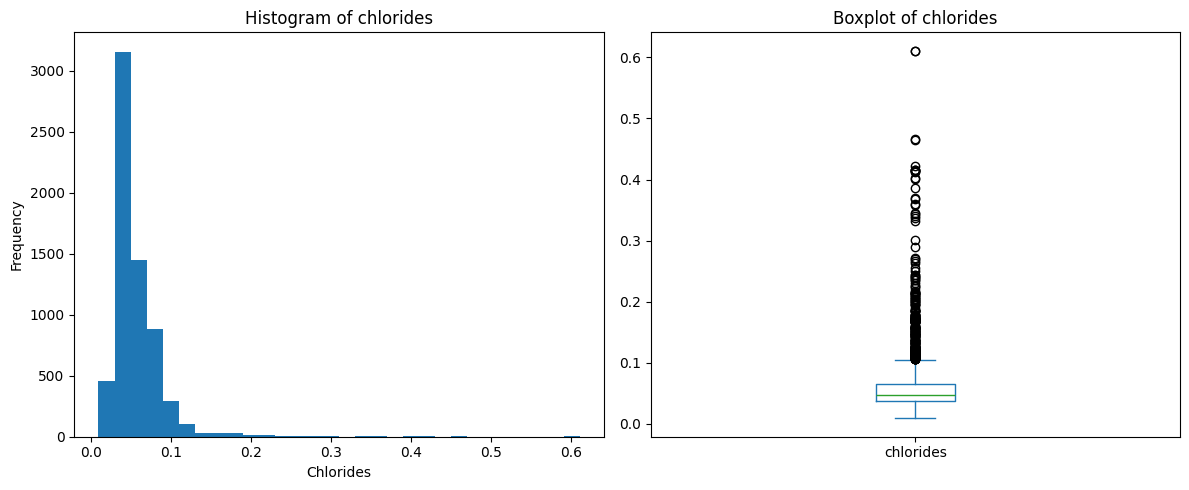

In [42]:
column = 'chlorides'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=30, ax=axes[0])
axes[0].set_xlabel('Chlorides')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Free sulfur dioxide

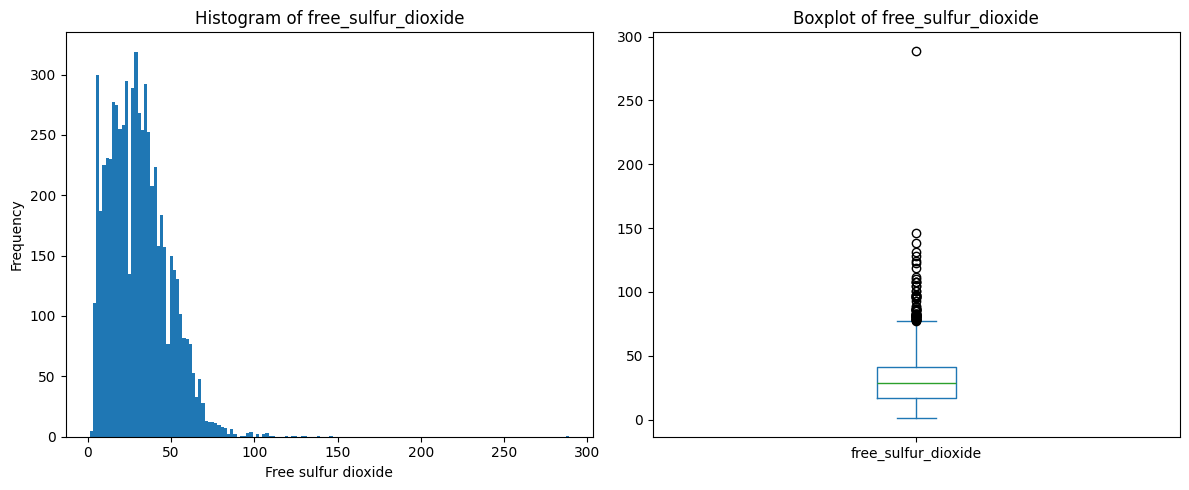

In [45]:
column = 'free_sulfur_dioxide'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=150, ax=axes[0])
axes[0].set_xlabel('Free sulfur dioxide')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Total sulfur dioxide

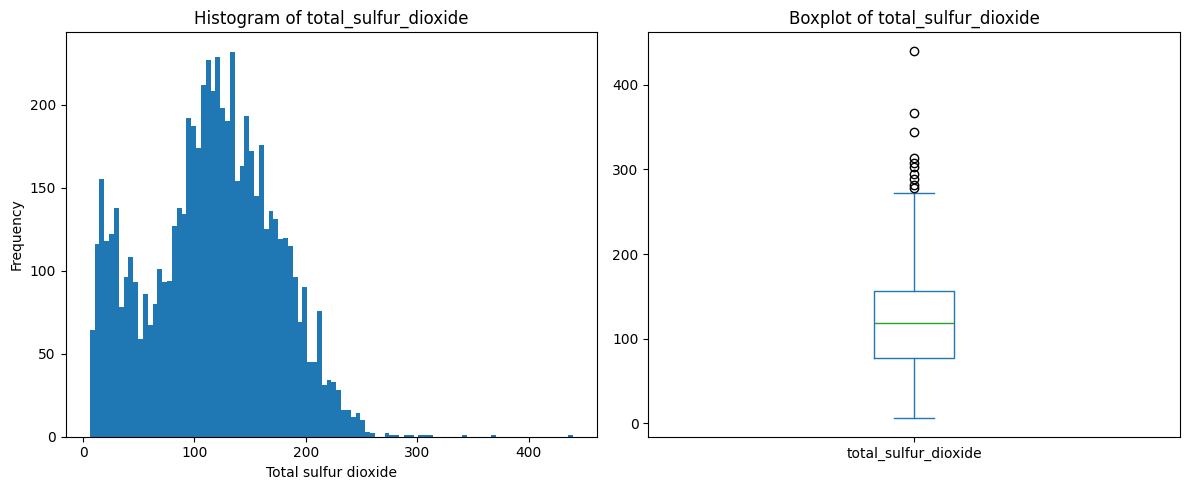

In [47]:
column = 'total_sulfur_dioxide'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=100, ax=axes[0])
axes[0].set_xlabel('Total sulfur dioxide')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Density

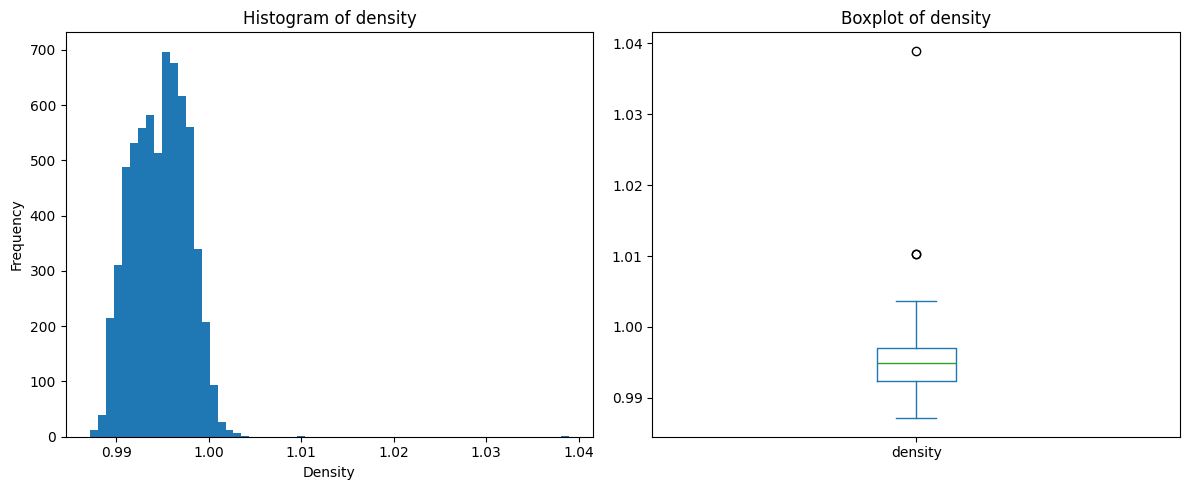

In [49]:
column = 'density'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=60, ax=axes[0])
axes[0].set_xlabel('Density')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## pH

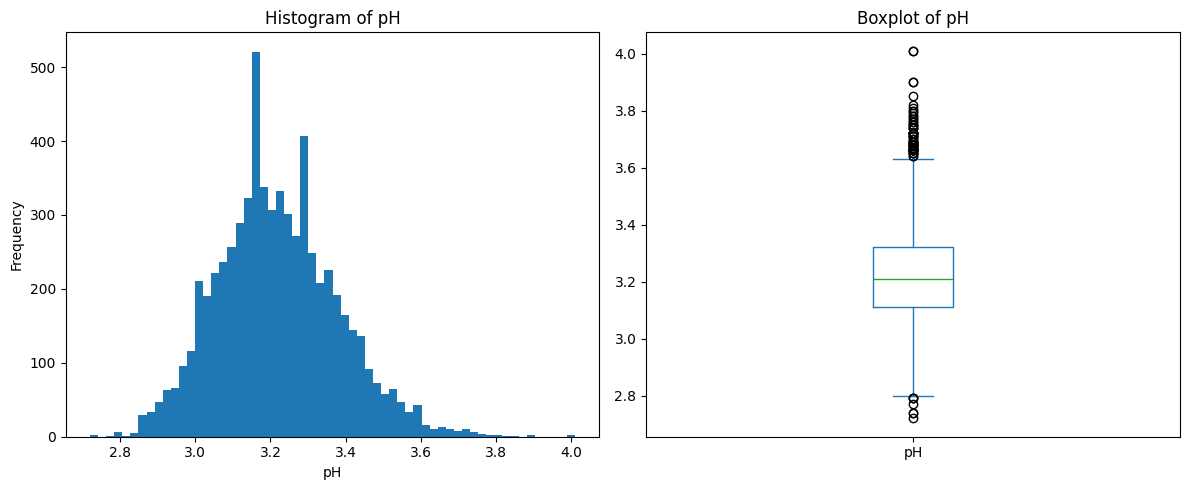

In [51]:
column = 'pH'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=60, ax=axes[0])
axes[0].set_xlabel('pH')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Sulphates

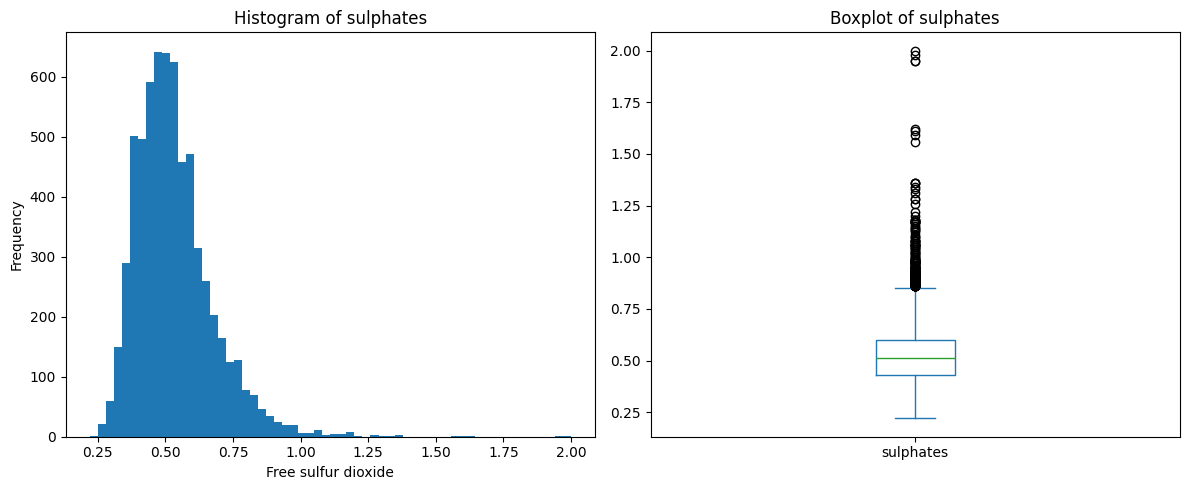

In [54]:
column = 'sulphates'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=60, ax=axes[0])
axes[0].set_xlabel('Free sulfur dioxide')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Alcohol

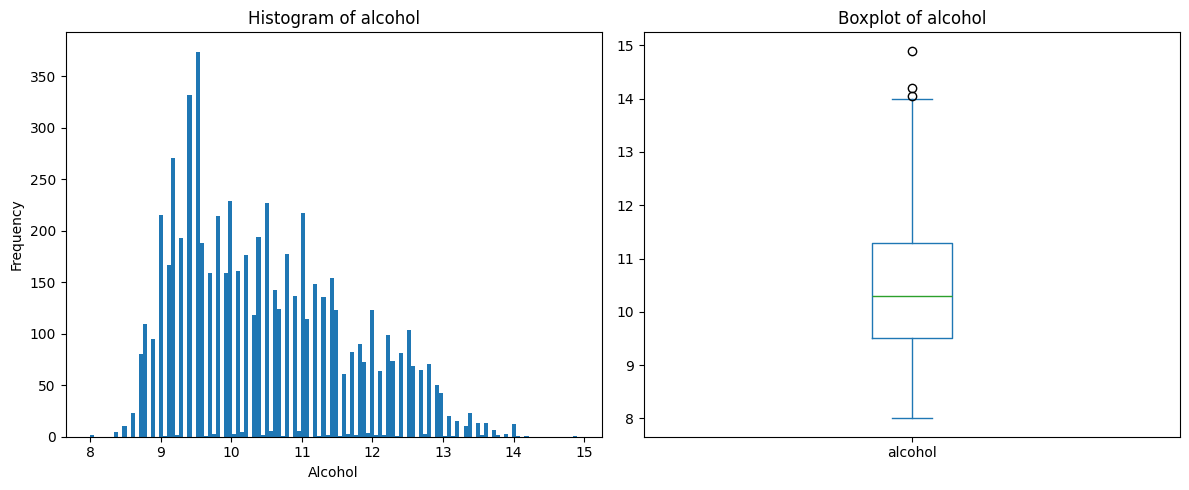

In [59]:
column = 'alcohol'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
X[column].dropna().plot.hist(bins=120, ax=axes[0])
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
X[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Quality (Output)

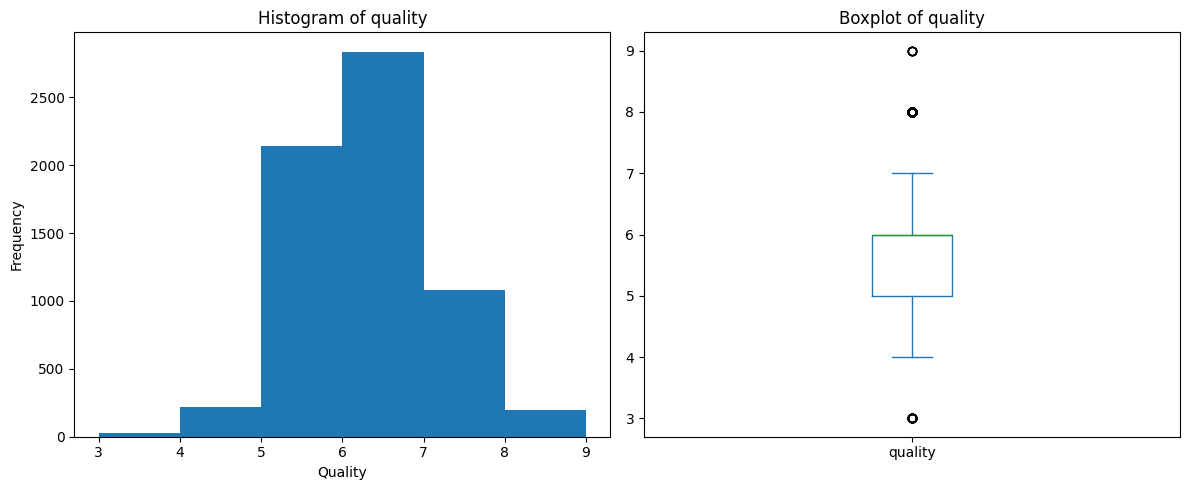

In [13]:
column = 'quality'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
y[column].dropna().plot.hist(bins=6, ax=axes[0])
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of {column}')

# Boxplot
y[column].dropna().plot.box(ax=axes[1])
axes[1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## Summary

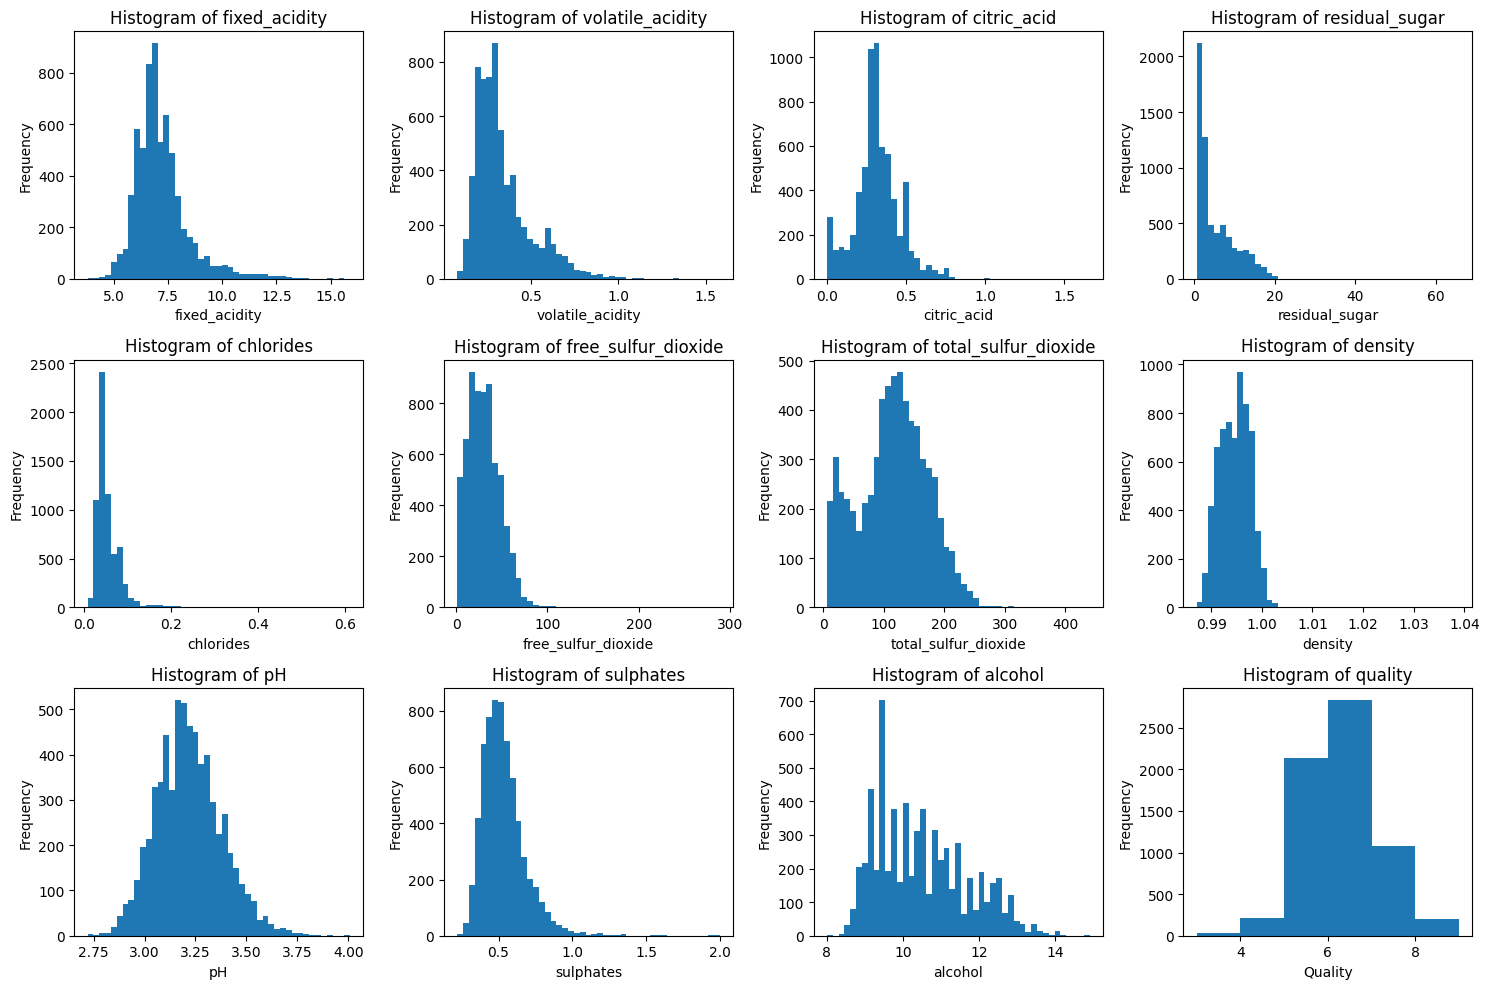

In [11]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    X[col].dropna().plot.hist(bins=45, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {col}")

y['quality'].dropna().plot.hist(bins=6, ax=axes[11])
axes[11].set_xlabel('Quality')
axes[11].set_ylabel('Frequency')
axes[11].set_title(f'Histogram of quality')

plt.tight_layout()
plt.show()

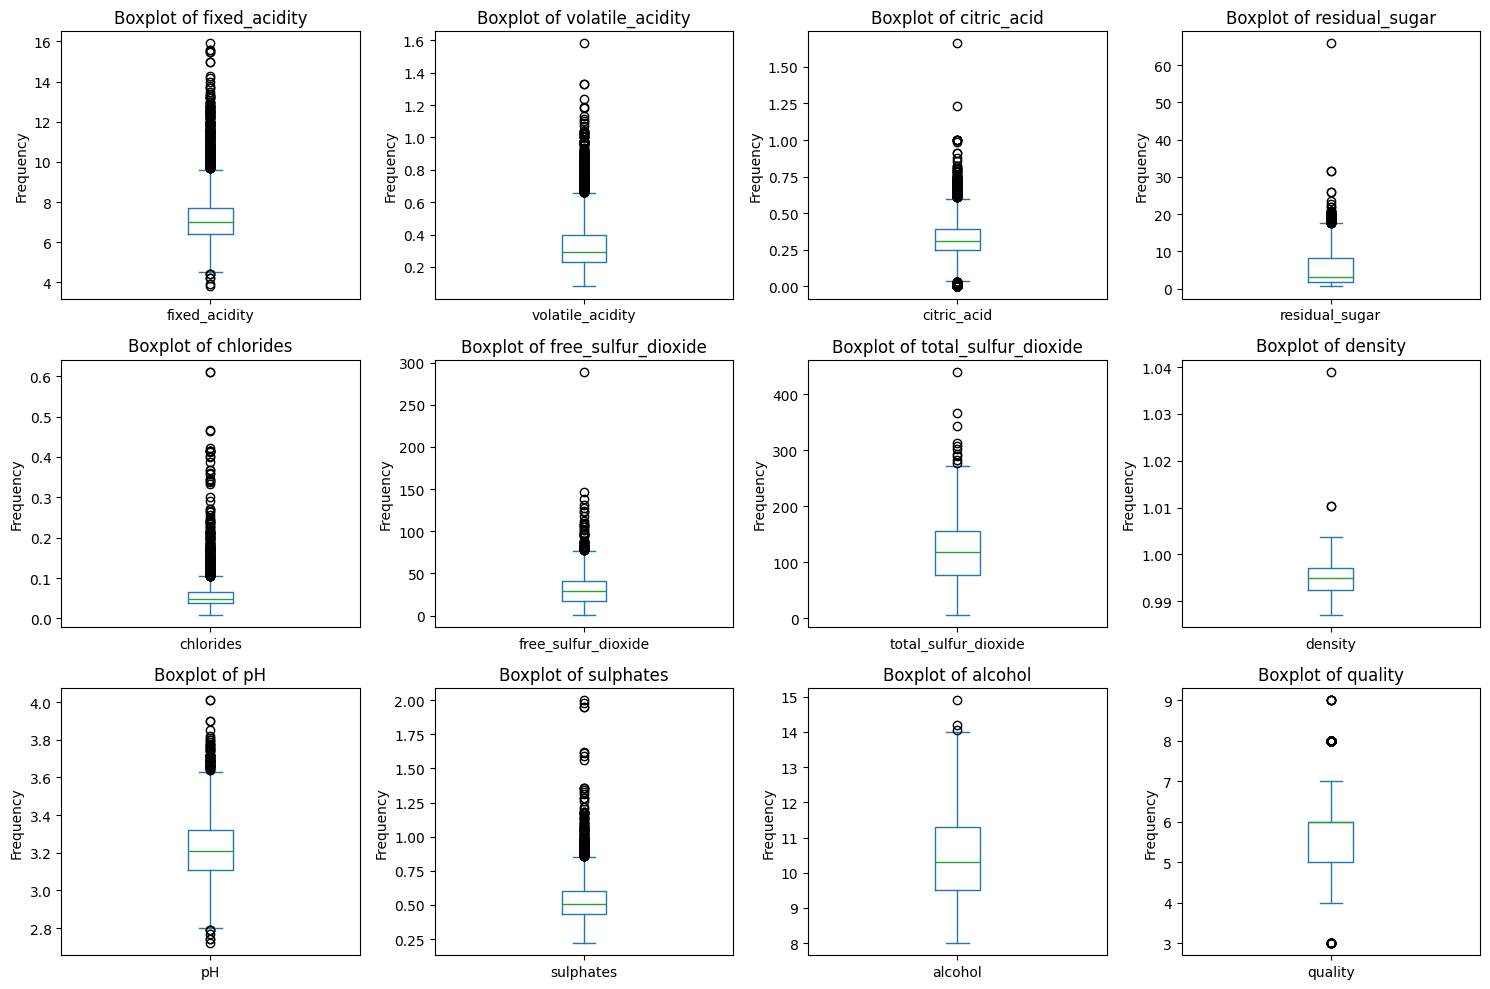

In [ ]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    X[col].dropna().plot.box(ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Boxplot of {col}")

y['quality'].dropna().plot.box(ax=axes[11])
axes[11].set_ylabel('Frequency')
axes[11].set_title(f'Boxplot of quality')

plt.tight_layout()
plt.show()

## Separate Wines

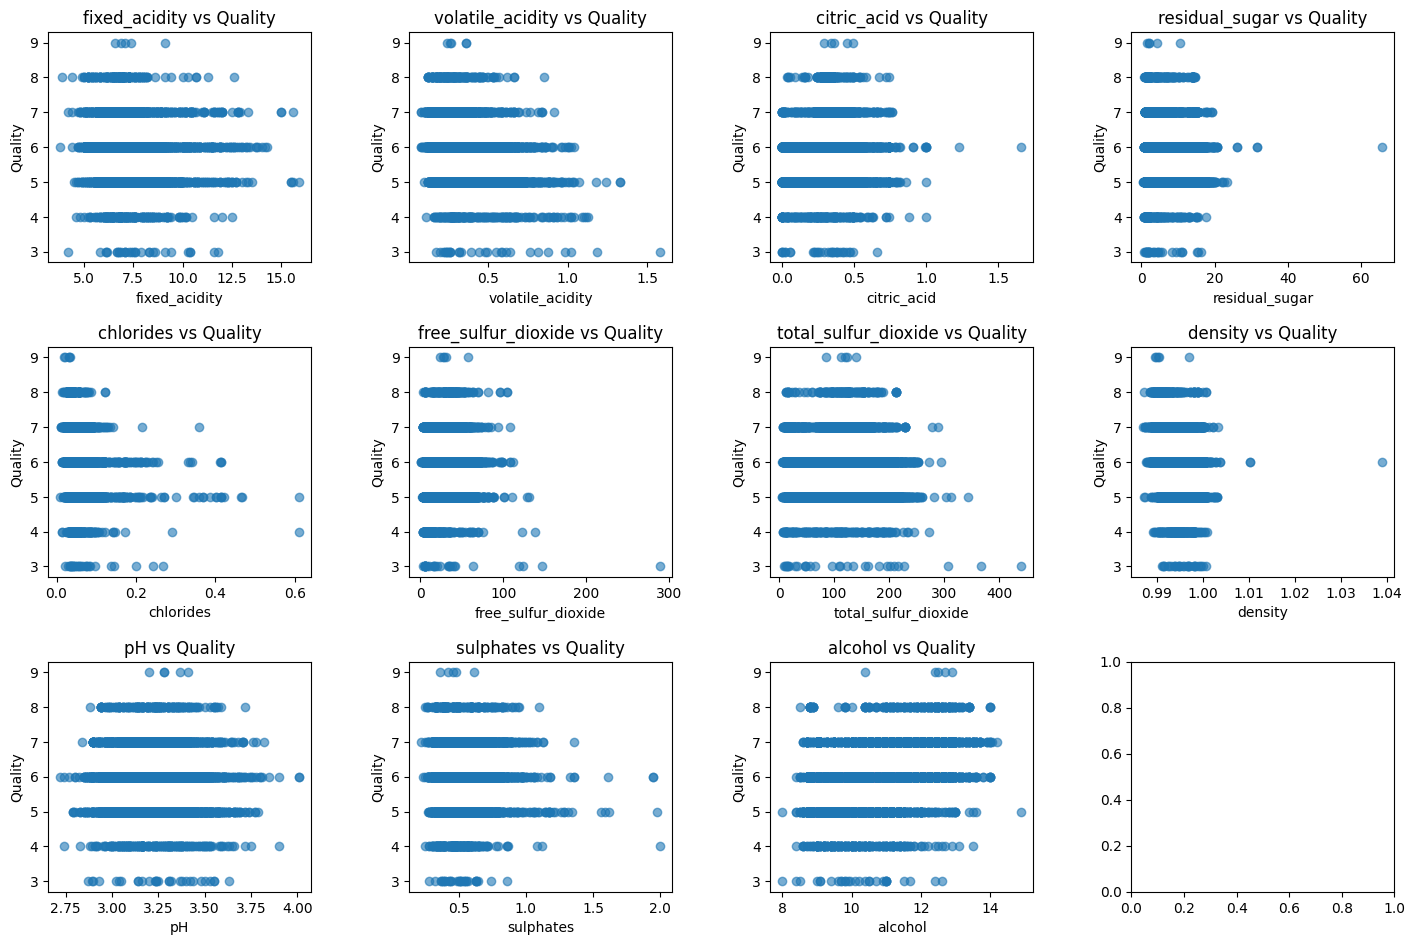

In [19]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=4.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].scatter(X[col], y['quality'], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{col} vs Quality")
plt.show()


## Conditional mono-variate analysis

In [4]:
red_wine_data   = pd.read_csv("dataset/winequality-red.csv",   sep=';')
white_wine_data = pd.read_csv("dataset/winequality-white.csv", sep=';')

red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
white_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


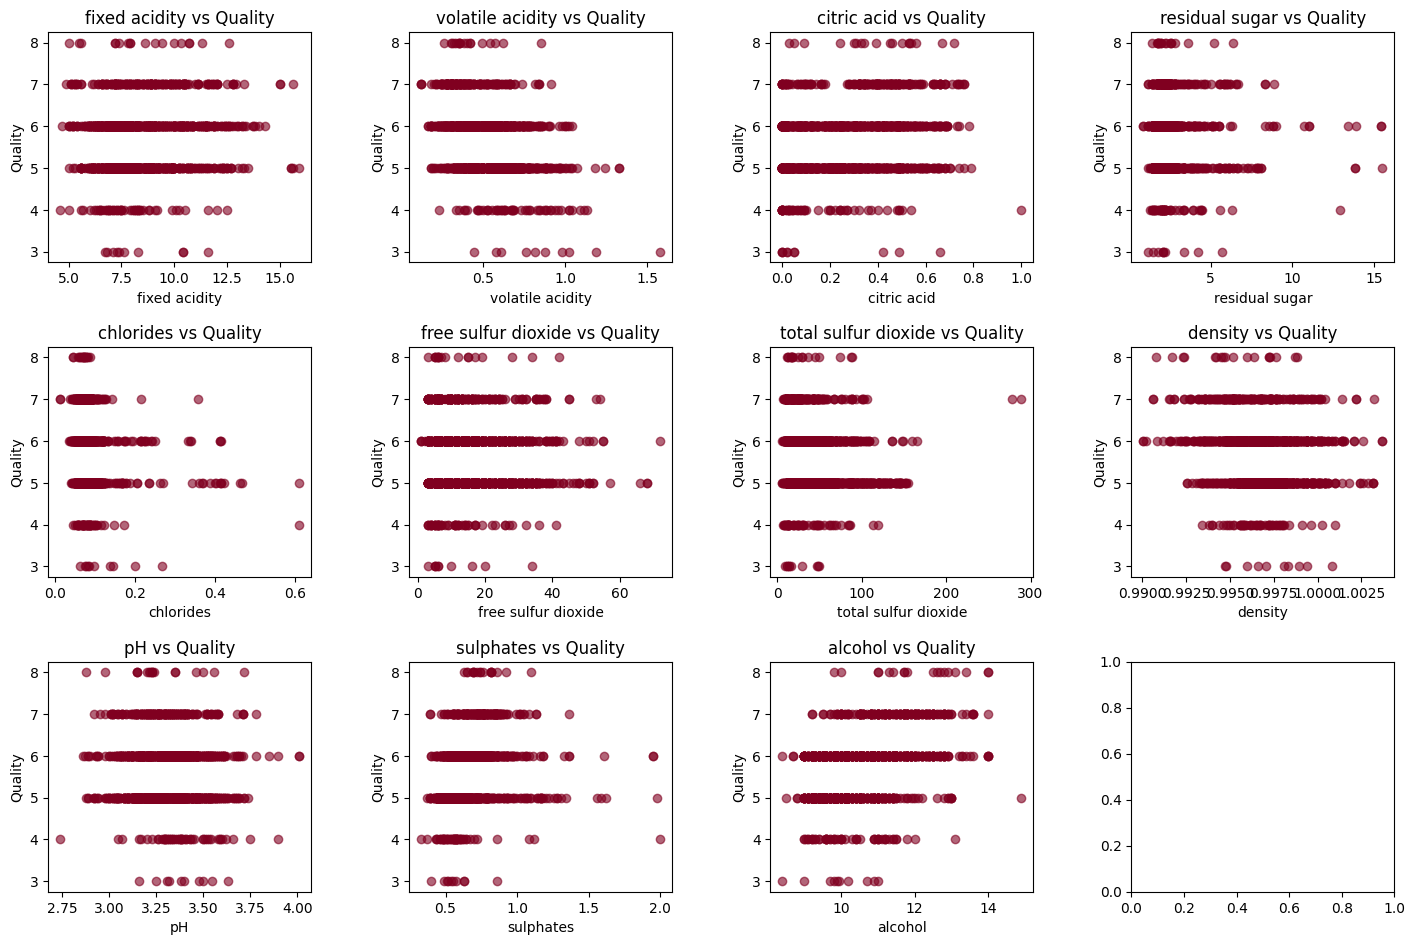

In [7]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=4.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].scatter(red_wine_data[col], red_wine_data['quality'], alpha=0.6, color='#800020')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{col} vs Quality")
plt.show()


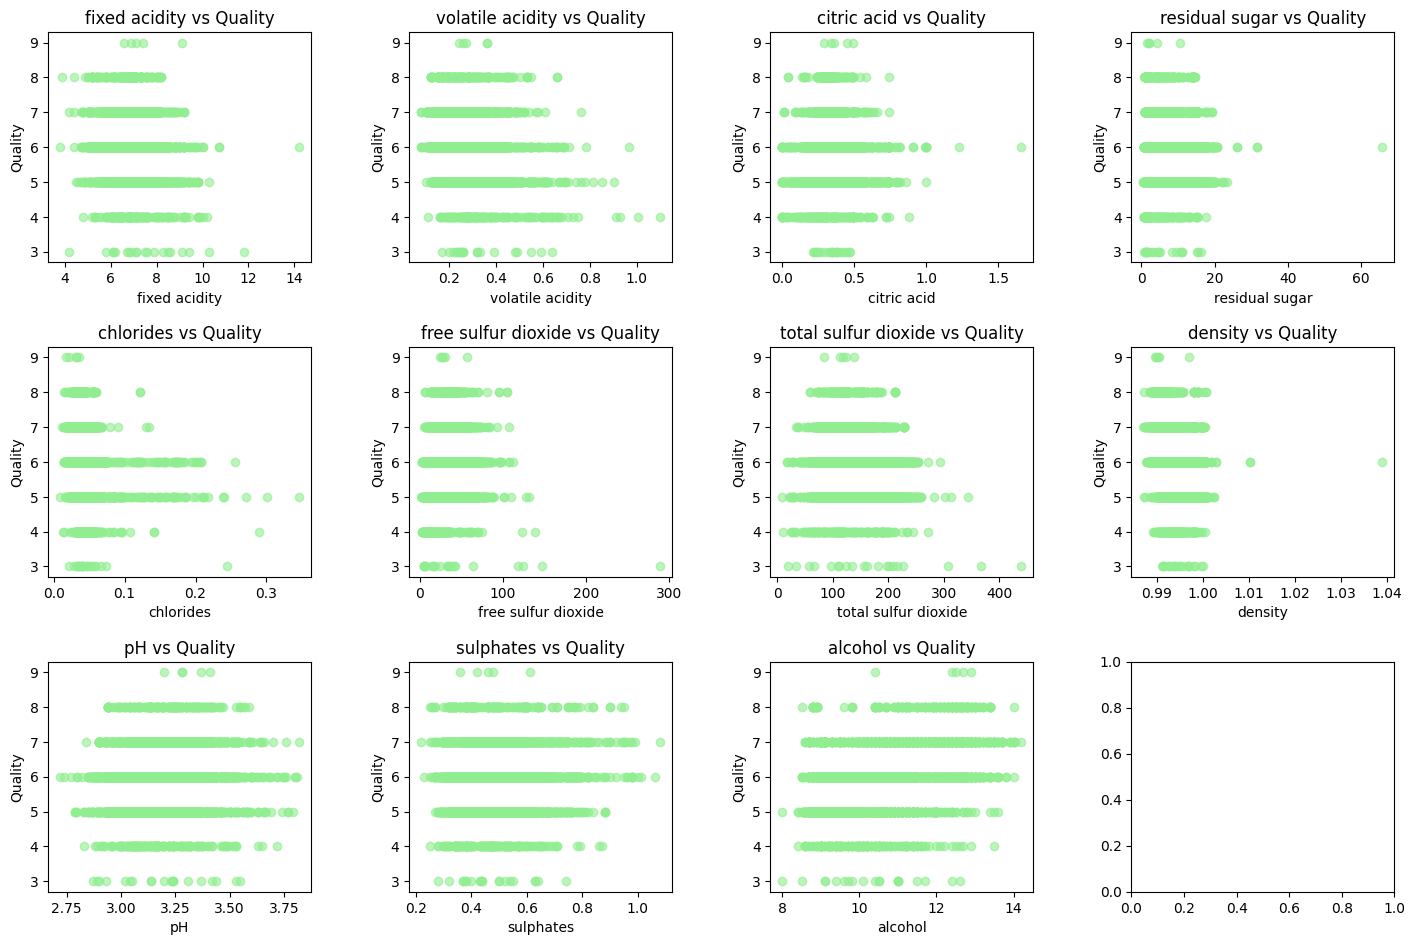

In [10]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=4.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].scatter(white_wine_data[col], white_wine_data['quality'], alpha=0.6, color='#90EE90')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{col} vs Quality")
plt.show()


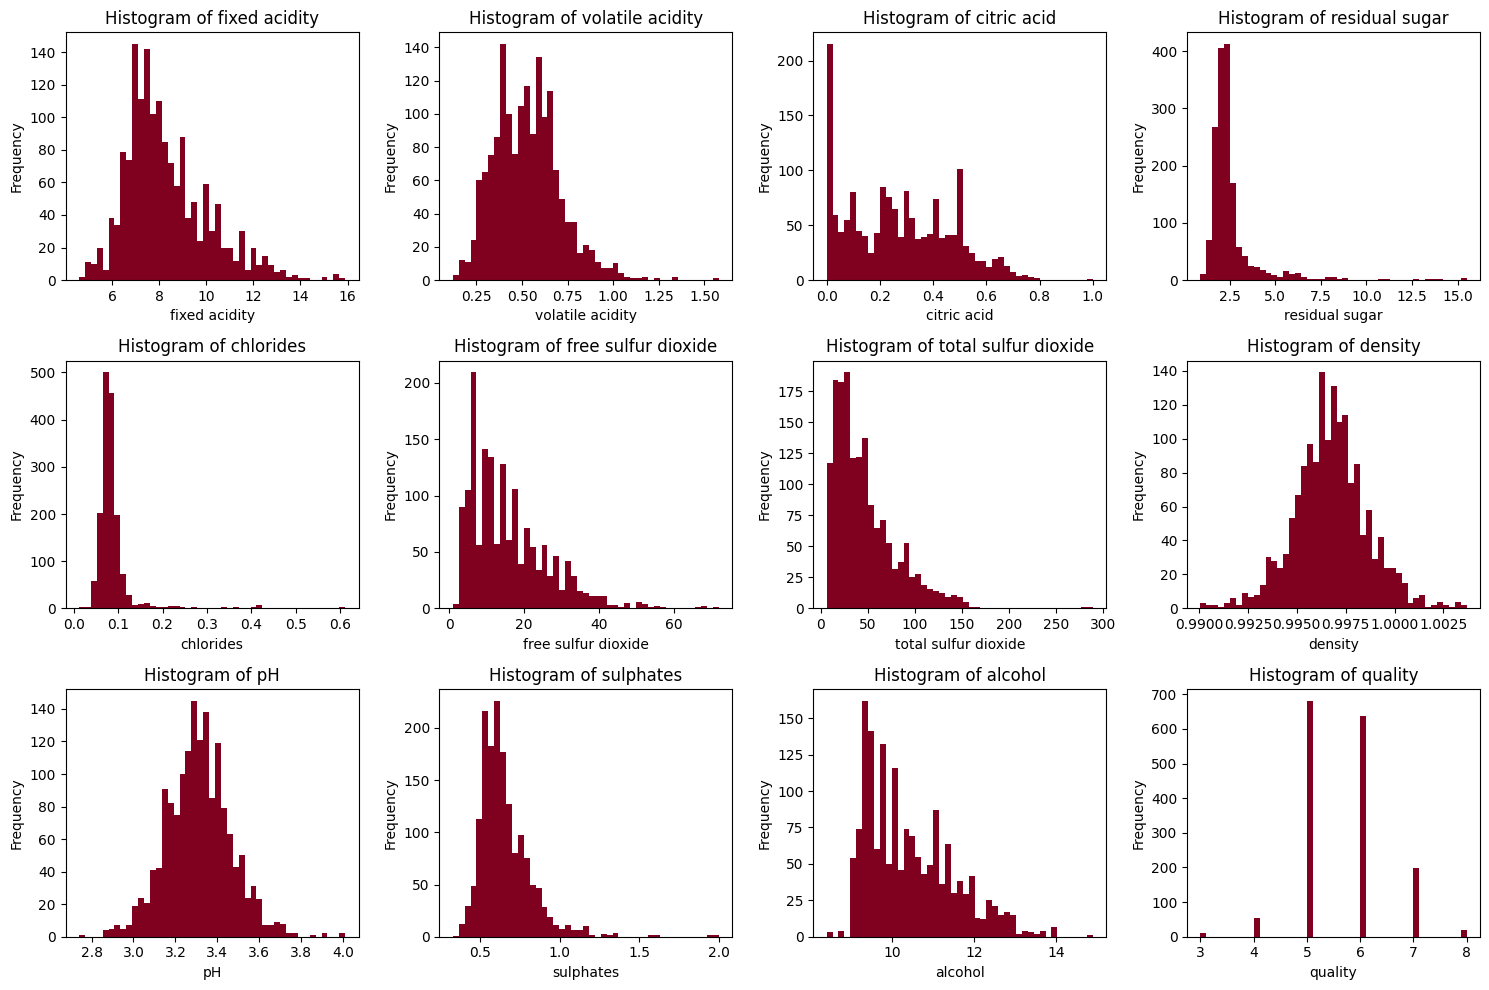

In [13]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    red_wine_data[col].dropna().plot.hist(bins=45, ax=axes[i], color='#800020')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

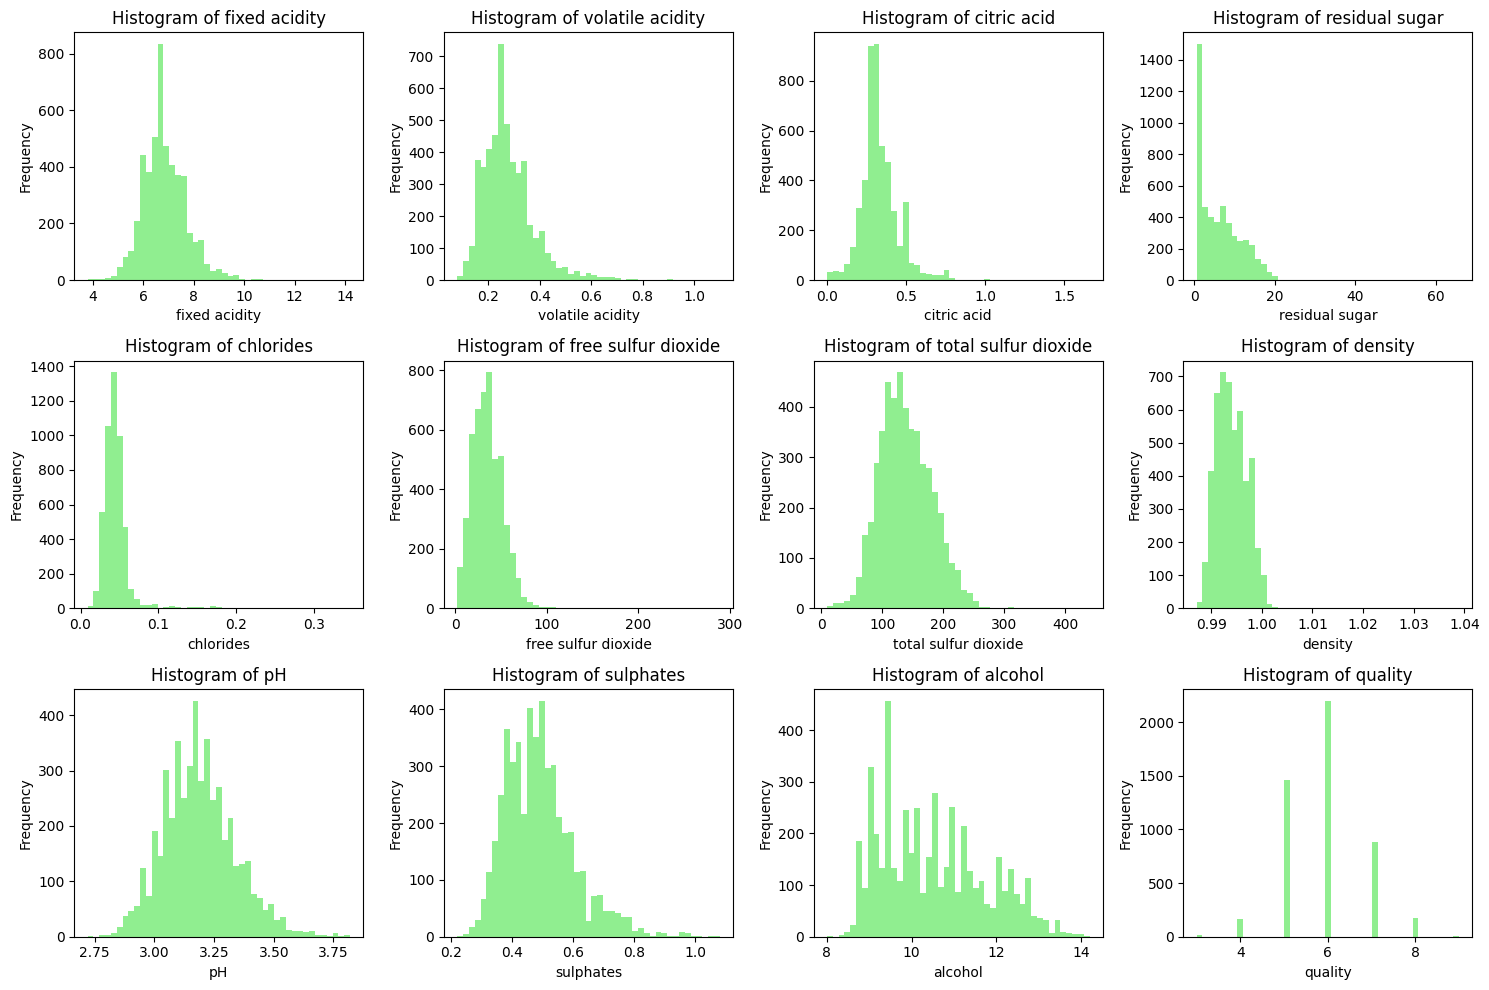

In [14]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
plt.tight_layout(pad=3.0)
axes = axes.ravel()

for i, col in enumerate(columns):
    white_wine_data[col].dropna().plot.hist(bins=45, ax=axes[i], color='#90EE90')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

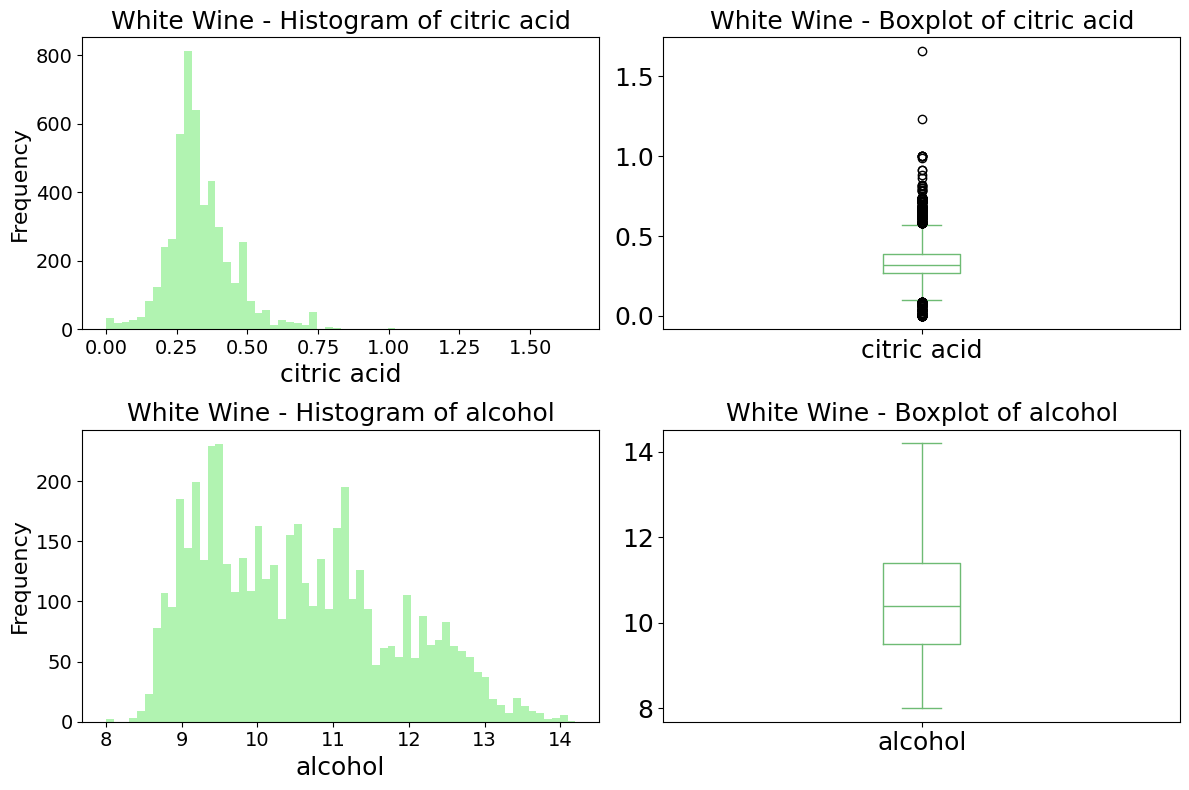

In [19]:
import matplotlib.pyplot as plt

columns = ['citric acid', 'alcohol']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram 1 - Red Wine (Density)
white_wine_data[columns[0]].dropna().plot.hist(bins=60, ax=axes[0, 0], color='#90EE90', alpha=0.7)
axes[0, 0].set_xlabel(columns[0], size=18)
axes[0, 0].set_ylabel('Frequency', size=16)
axes[0, 0].set_title(f'White Wine - Histogram of {columns[0]}', size=18)
axes[0,0].tick_params(labelsize=14)
# Boxplot 1 - Red Wine (Density)
white_wine_data[columns[0]].dropna().plot.box(ax=axes[0, 1], color='#6EBB74')
axes[0, 1].set_title(f'White Wine - Boxplot of {columns[0]}', size=18)
axes[0,1].tick_params(labelsize=18)
# Histogram 2 - White Wine (pH)
white_wine_data[columns[1]].dropna().plot.hist(bins=60, ax=axes[1, 0], color='#90EE90', alpha=0.7)
axes[1, 0].set_xlabel(columns[1], size=18)
axes[1, 0].set_ylabel('Frequency', size=16)
axes[1, 0].set_title(f'White Wine - Histogram of {columns[1]}', size=18)
axes[1,0].tick_params(labelsize=14)
# Boxplot 2 - White Wine (pH)
white_wine_data[columns[1]].dropna().plot.box(ax=axes[1, 1],color='#6EBB74')
axes[1, 1].set_title(f'White Wine - Boxplot of {columns[1]}', size=18)
axes[1,1].tick_params(labelsize=18)

plt.tight_layout()
plt.show()


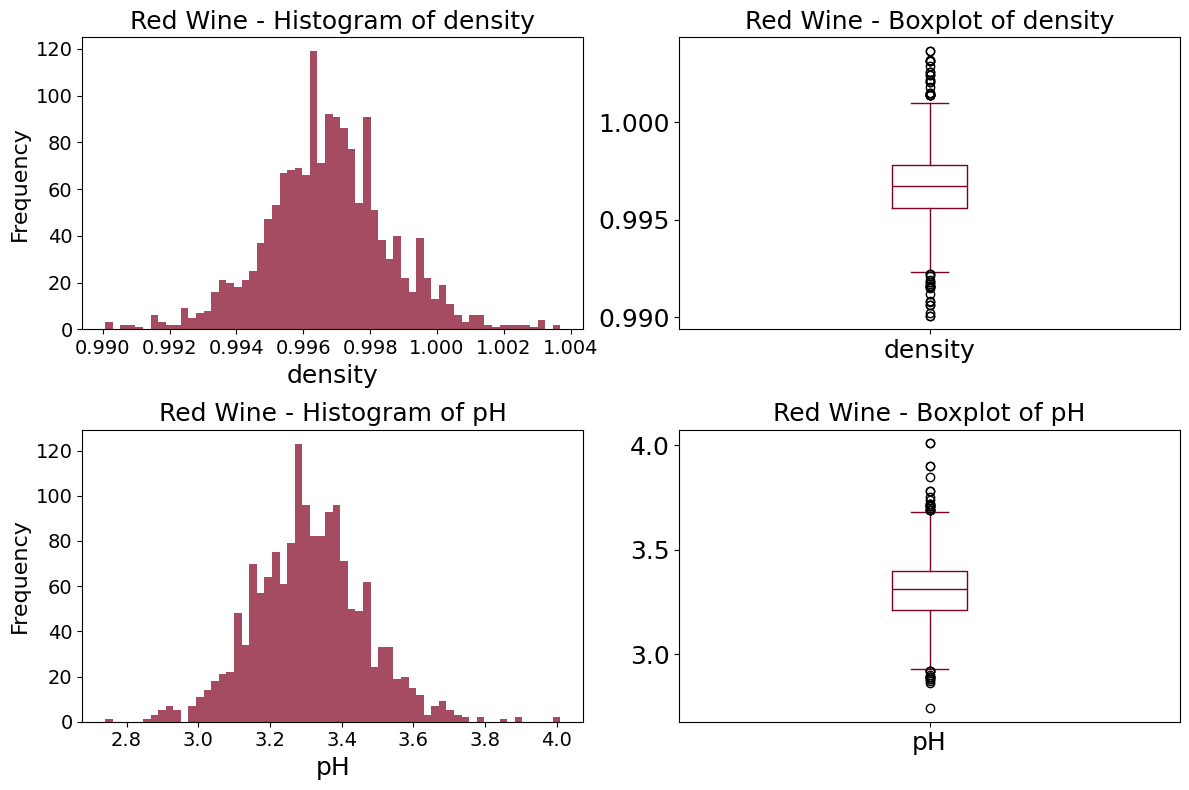

In [18]:
import matplotlib.pyplot as plt

columns = ['density', 'pH']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram 1 - Red Wine (Density)
red_wine_data[columns[0]].dropna().plot.hist(bins=60, ax=axes[0, 0], color='#800020', alpha=0.7)
axes[0, 0].set_xlabel(columns[0], size=18)
axes[0, 0].set_ylabel('Frequency', size=16)
axes[0, 0].set_title(f'Red Wine - Histogram of {columns[0]}', size=18)
axes[0,0].tick_params(labelsize=14)
# Boxplot 1 - Red Wine (Density)
red_wine_data[columns[0]].dropna().plot.box(ax=axes[0, 1], color='#800020')
axes[0, 1].set_title(f'Red Wine - Boxplot of {columns[0]}', size=18)
axes[0,1].tick_params(labelsize=18)
# Histogram 2 - White Wine (pH)
red_wine_data[columns[1]].dropna().plot.hist(bins=60, ax=axes[1, 0], color='#800020', alpha=0.7)
axes[1, 0].set_xlabel(columns[1], size=18)
axes[1, 0].set_ylabel('Frequency', size=16)
axes[1, 0].set_title(f'Red Wine - Histogram of {columns[1]}', size=18)
axes[1,0].tick_params(labelsize=14)
# Boxplot 2 - White Wine (pH)
red_wine_data[columns[1]].dropna().plot.box(ax=axes[1, 1],color='#800020')
axes[1, 1].set_title(f'Red Wine - Boxplot of {columns[1]}', size=18)
axes[1,1].tick_params(labelsize=18)

plt.tight_layout()
plt.show()


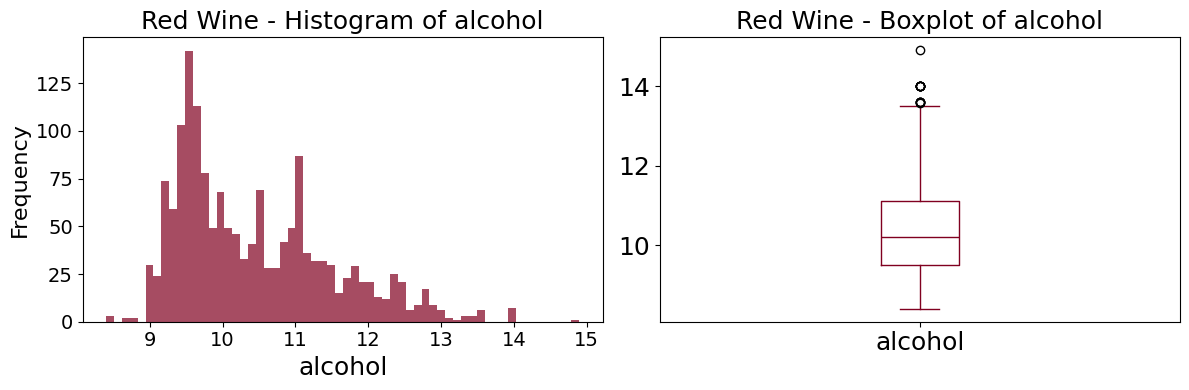

In [29]:
import matplotlib.pyplot as plt

columns = ['alcohol', 'fixed acidity']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram 1 - Red Wine (Density)
red_wine_data[columns[0]].dropna().plot.hist(bins=60, ax=axes[0], color='#800020', alpha=0.7)
axes[0].set_xlabel(columns[0], size=18)
axes[0].set_ylabel('Frequency', size=16)
axes[0].set_title(f'Red Wine - Histogram of {columns[0]}', size=18)
axes[0].tick_params(labelsize=14)
# Boxplot 1 - Red Wine (Density)
red_wine_data[columns[0]].dropna().plot.box(ax=axes[1], color='#800020')
axes[1].set_title(f'Red Wine - Boxplot of {columns[0]}', size=18)
axes[1].tick_params(labelsize=18)

plt.tight_layout()
plt.show()


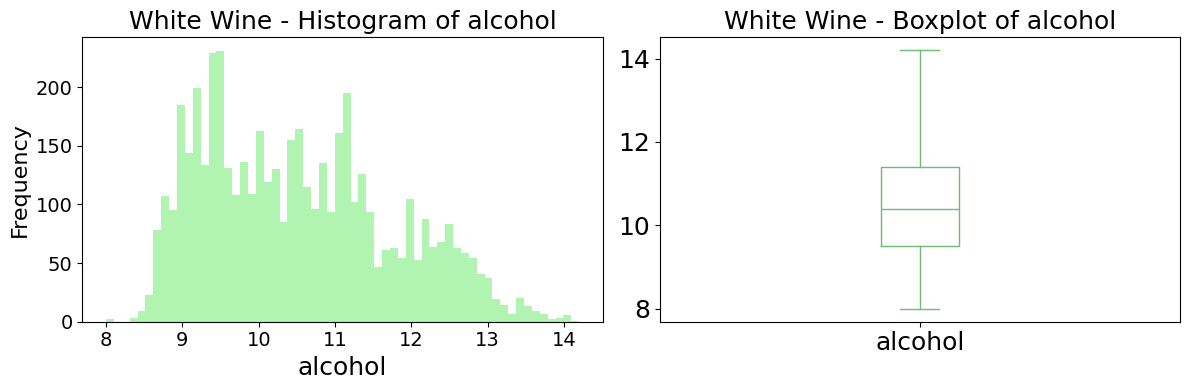

In [5]:
import matplotlib.pyplot as plt

columns = ['citric acid', 'alcohol']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

white_wine_data[columns[1]].dropna().plot.hist(bins=60, ax=axes[0], color='#90EE90', alpha=0.7)
axes[0].set_xlabel(columns[1], size=18)
axes[0].set_ylabel('Frequency', size=16)
axes[0].set_title(f'White Wine - Histogram of {columns[1]}', size=18)
axes[0].tick_params(labelsize=14)
# Boxplot 2 - White Wine (pH)
white_wine_data[columns[1]].dropna().plot.box(ax=axes[1],color='#6EBB74')
axes[1].set_title(f'White Wine - Boxplot of {columns[1]}', size=18)
axes[1].tick_params(labelsize=18)

plt.tight_layout()
plt.show()
